# Crop Recommendation System 
## Introduction 
In the modern agricultural landscape, numerous challenges arise from erratic weather patterns and diminishing soil health to escalating food demands. Farmers, particularly in areas that depend on seasonal variations, often find it challenging to select the appropriate crops for their fields, which can result in poor yields and financial losses. It is increasingly essential to make precise and informed decisions about what to cultivate, where, and when.This project introduces a Crop Recommendation System that utilizes machine learning to help farmers choose the most appropriate crops based on essential environmental parameters. By leveraging a dataset that includes values for soil nutrients (Nitrogen, Phosphorus, Potassium), temperature, humidity, pH level, and rainfall, the system forecasts the ideal crop for a given set of conditions. 

We utilize tools and libraries such as Python, Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn, to effectively explore, visualize, and model the data, and to look more attractive, we used the Plotly library, read on an online platform, and got references from one example.
A variety of machine learning models, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, XGBoost, and others, have been trained and evaluated to identify the most effective strategy. The end goal is not only accuracy but also usability,  providing a tool that can support more intelligent, data-driven decisions in agriculture.


##  Problem Framing

Goal Type  
The problem is formulated as a supervised multiclass classification task, wherein the objective is to predict the most suitable crop based on a given set of environmental and soil parameters. A classification algorithm will be trained on historical data containing labeled crop outcomes.

Given a set of soil and climatic conditions represented by Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall, the task is to accurately classify the most suitable crop for cultivation.


## Target Variable  
The target variable is Crop, which is categorical in nature. Since machine learning models require numerical inputs, encoding methods such as label encoding or one-hot encoding will be applied, depending on the model architecture selected during development.

## Feature	Description	Data Type  
N	-Nitrogen level in soil (mg/kg)	-Numerical  
P	-Phosphorus level in soil (mg/kg)	-Numerical  
K	-Potassium level in soil (mg/kg)	-Numerical  
temperature	-Temperature of the region (°C)	-Numerical  
humidity	-Relative humidity (%)	-Numerical  
ph	-Soil pH (acidity level)	-Numerical  
rainfall	-Rainfall received (mm)	-Numerical  

## Real-world Need
In the agricultural domain, optimal crop selection is crucial for ensuring food security, maximizing yield, and enhancing resource efficiency. By leveraging historical data and machine learning techniques, an intelligent decision-support system can be developed to recommend the best crop for a given condition. This can reduce the reliance on traditional methods, mitigate risks caused by environmental variability, and promote sustainable agricultural practices.

## Expected Outcome
The expected outcome of this project is a trained classification model capable of predicting the most appropriate crop based on soil nutrient levels and climate-related parameters. The model performance will be evaluated using appropriate metrics such as accuracy, precision, recall, F1-score, and confusion matrix to understand its reliability and class-wise prediction capabilities. The final solution may be utilized as part of a crop recommendation engine or integrated into a larger agricultural advisory platform.

## Data Cleaning and Understanding 
This step involves examining the dataset to ensure its quality before modeling. Key tasks include checking for missing values, identifying outliers—especially in features like Nitrogen (N), Phosphorus (P), Potassium (K), and rainfall—and analyzing class distribution to detect any imbalance. These checks help prepare the data for accurate and unbiased model training, with further cleaning decisions to be made based on the findings.

### Import main Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from sklearn.preprocessing import LabelEncoder
import base64 

#### Overviews
The imported Python libraries are a collection of the commonly used libraries used for visualization, analysis, and preprocessing the data. import pandas and import numpy are required to process structured and numerical calculations respectively. seaborn and matplotlib.pyplot are used to form static visualizations in the form of charts and plots while plotly.express and plotly.graph_objects and plotly.subplots are used to form interactive and animated visualizations. scipy.stats is imported twice redundantly and provides a wide range of statistical functions, e.g., normal and correlation tests. The os module is used to form interaction with the operating system, commonly used to form interaction with files and directories. LabelEncoder from sklearn.preprocessing is used to encode categorical text type data in numerical form suitable to feed into the machine models. The final import is the base64 module used to encode binary type data to ASCII form and sometimes used in web apps or during the process of files being embedded in HTML. This collection of libraries gives a data scientist a good toolset to carry out end-to-end data processing and analysis and visualization.

### Access to Dataset.

In [3]:
#read dataset
df = pd.read_csv('Crop_recommendation.csv')

### Display the dataset 

In [5]:
#first 5 columns 
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [7]:
#showing bottom 5 columns
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [9]:
# Showing Basic Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Description of Dataframe structure

###### 1) (Nutrient values) N , P, and K values are integers.
###### 2) Other variables (environmental values) are floats.
###### 3) The label column (crop type) is an object.
###### 4) NO missing values in any column.

In [11]:
#Summary of the Dataset 
df.describe(include='all')

N            P            K  temperature     humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

                 ph     rainfall label  
count   2200.000000  2200.000000  2200  
unique          NaN          NaN    22  
top             NaN          NaN  rice  
freq            NaN          NaN   100  
mean       6.469480   103.463655   NaN  
std        0.773938    54.958389   NaN  
min        3.504752    20.211267   NaN  
25%        5.971693    64.551686   NaN  
50%        6.425045    94.867624   NaN  
75%        6.923643   124.267508   NaN  
max        9.935091   298.560117   NaN

#### Summary of the Dataset 

Unique - Number of different values (which is 22)  
top - Most frequent value (rice)  
Freq - frequency of each value (crop label has 100)

(Nitrogen) Average value of N is 50.55 (starting from min value(0.00) to maxe (140)).
(pH level) The average is 6.8 (neutral), starting from 3.5 (acidic) to 9.93 (slightly alkaline).
(Temperature) 25% of the data is below 22.77°C, 50% (median) is below 25.60°C, 75% is below 28.56°C.

(Humidity) The average is 71.28. The STD is 22.26. (~68% of data falls within ±1 std, ~95% within ±2 std)  
Mean ± 1 → 71.48 ± 22.26  
This means about 68% of the humidity values are between
49.22 and 93.74

In [13]:
#Get unique values 
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

#### Summary of Unique values 

temperature, humidity, ph, and rainfall are continuous variables with no repeats  
N, P, K are discrete integers but still have enough variation  
label has 22 unique classes 

In [15]:
df.shape

(2200, 8)

Dataset has 2200 rows and 8 columns. 

## Checking null values wih visualization

<Axes: >

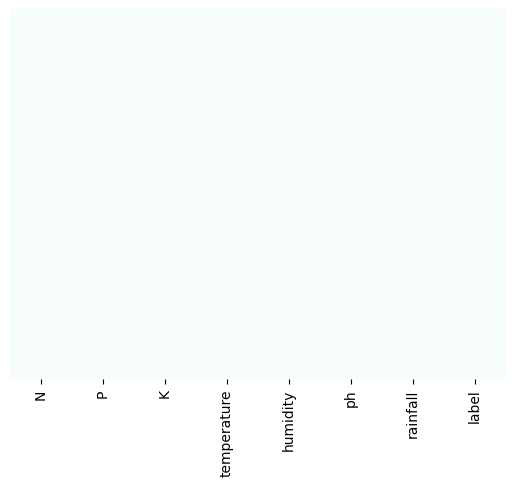

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar =False,cmap ='BuPu')

1) The above visualization is a Seaborn heatmap to detect null values.

2) Hide the row label and color bar by using the False boolean.
 
3) Only one solid color in the entire map means there are no missing values. 

In [21]:
print("Number of various crops: ", len(df['label'].unique()))

Number of various crops:  22


In [23]:
print("List of crops: ", df['label'].unique())

List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


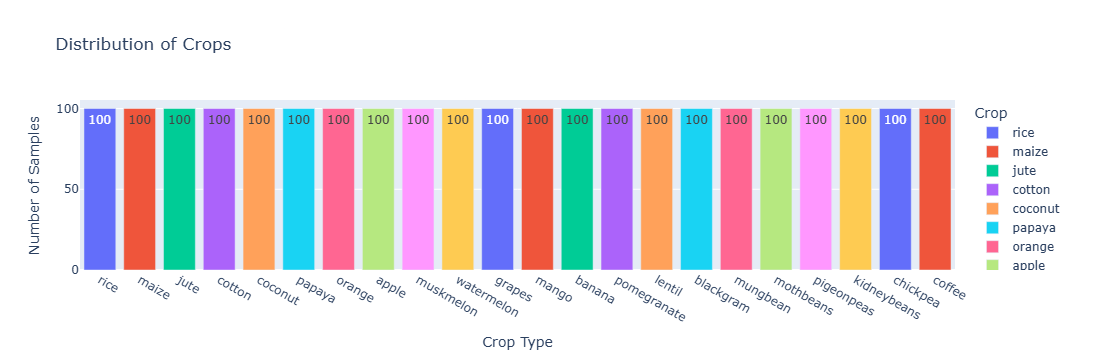

In [25]:
crop_count = df['label'].value_counts().reset_index()
crop_count.columns = ['Crop', 'Count']

fig = px.bar(crop_count, x='Crop', y='Count', color='Crop',
             title='Distribution of Crops',
             text='Count')
fig.update_layout(xaxis_title='Crop Type', yaxis_title='Number of Samples')
fig.show()

The dataset has 22 different types of crops, including rice, maize, chickpea, etc. 

#### Count Distribution 

This bar plot shows each crop has 100 number of samples.  
Every crop is color-coded.  
The bar chart is created by using plotly express to be interactive. 

#### code explanation

we are using ploty softwere to look more attrective. we denoted px.bar() for bar graph.


## Data Cleaning and Mining using Object Oriented Programming Language.


In [28]:
class DataCleaner:
    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):  # Ensure input is a DataFrame
            raise ValueError("Input data must be a pandas DataFrame.")
        self.data = data  # Store the DataFrame in the instance

   
    def analyze_nulls(self):
        null_counts = self.data.isnull().sum()  # Count nulls in each column
        return null_counts

    def analyze_duplicates(self, subset=None):
        duplicate_count = self.data.duplicated(subset=subset).sum()
        return duplicate_count

    def summary(self):
        return {
            'shape': self.data.shape,  # Number of rows and columns
            'null_counts': self.analyze_nulls().to_dict(),  # Null values in each column
            'duplicate_count': self.analyze_duplicates(),  # Total duplicate rows
        }

In [30]:
cleaner = DataCleaner(df)

# Analyze null values
cleaner.analyze_nulls()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [32]:
cleaner.analyze_duplicates()

0

In [34]:
cleaner.summary()

{'shape': (2200, 8),
 'null_counts': {'N': 0,
  'P': 0,
  'K': 0,
  'temperature': 0,
  'humidity': 0,
  'ph': 0,
  'rainfall': 0,
  'label': 0},
 'duplicate_count': 0}

#### From Data Cleaner class

Data has 2200 records and 8 features  
No null values in any column  
No duplicates in the entire dataset  

#### code explanation

DataCleaner is a Python utility intended to assist with the initial exploration and quality check of a dataset in the form of a pandas DataFrame. Upon initialization of the DataCleaner class, it checks immediately that it is a DataFrame and will raise a ValueError otherwise. After the input checks, the data is stored internally for inspection. The method analyze_nulls checks each column to find the missing values (null) and returns the count in each. The method analyze_duplicates calculates the number of duplicate rows in the entire dataset or a given subset of columns. To provide snapshot type feedback, the method summary returns a dictionary with the dataset size (number of rows and columns), the number of missing values listed by column, and the total number of duplicate rows. This utility is particularly useful in the course of the data preprocessing tasks and provides immediate feedback in the event of quality issues in the data before further processing or model construction.

## Stastistical Analysis of the Dataset

1. Skewness
2. Kurtosis
3. Zscore 

In [38]:
# Create a dictionary to store statistical summaries
stat_summary = {}

# Numerical columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# For each numeric column, compute skewness, kurtosis, and Z-score
for col in numeric_cols:
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    
    # Compute Z-scores and take the maximum absolute value
    z_scores = stats.zscore(df[col])
    max_abs_z = abs(z_scores).max()

    stat_summary[col] = {
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Max |Z-score|': max_abs_z
    }

# Convert dictionary to DataFrame
stat_df = pd.DataFrame(stat_summary).T
print("Statistical EDA Summary:\n")
print(stat_df)

Statistical EDA Summary:

             Skewness  Kurtosis  Max |Z-score|
N            0.509374 -1.058562       2.423483
P            1.010083  0.855599       2.778707
K            2.373547  4.436523       3.097591
temperature  0.184807  1.227029       3.567190
humidity    -1.090963  0.298722       2.570842
ph           0.283736  1.649095       4.478912
rainfall     0.965098  0.602974       3.550701


### Interpretation of Statistical Summary  

#### Skewness tells whether the data is balanced or leaning more to one side.

Skew = 0 → symmetric distribution  
Positive skew → long tail on the right (more small values)  
Negative skew → long tail on the left (more large values)  

K, P, rainfall: Right-skewed → Some high extreme values (long tail on right)  
humidity: Left-skewed → Some very low humidity values  
temperature and ph: Near-symmetric (skew < 0.3)  
  
#### Kurtosis tells how "pointy" or "flat" the data is, and how many outliers it might have.  
Kurtosis ≈ 3 → normal shape
bigger than 3 → sharp peak and heavy tails (more outliers)  
less than  3 → flat shape with light tails (few outliers)  

K (4.44) and ph (1.65): Higher kurtosis → Sharper peaks, heavier tails  
N (-1.05): Very flat and light-tailed → Platykurtic  
Most others: Near-normal or slightly flat  

#### Z-Score (Outlier Intensity)
Z-score tells how far a value is from the average (mean), in standard deviations.  
Z ≈ 0 → value is close to the mean  
Z > 3 or < -3 → likely an outlier  
  
ph: Z-score > 4 → Strong outlier exists  
temperature, rainfall, K: Z-score > 3 → Outliers present  
N, P, humidity: Z-score < 3 → No significant outliers  

#### Code brief
This python script performs a straightforward statistical analysis across each numeric column in a dataset. The script begins with the initialization of the empty dictionary stat_summary where it will store the findings. The script thereafter selects the numeric columns from the DataFrame df using the pandas module. The script then goes ahead to calculate the skewness, kurtosis, and the highest absolute Z-score across each numeric column.

Skewness tells us whether the data are symmetrically distributed or skewed to the right or left. Kurtosis tells us about the heaviness or lightness of the tails of the data—whether or not the column holds more extreme values (outliers). The Z-score is utilized to find the deviation of the data points from the value of the mean. A high value in the maximum value of the Z-score shows the occurrence of extreme values within the column.

These values are put in the dictionary and the dictionary is then turned into a DataFrame so it can easily be printed out and viewed. This summary gives a quick and easy look at the behavior of each numerical column in the dataset and identifies any suspicious data that needs to be cleaned and transformed prior to further analysis being conducted.



In [43]:
crop_Means = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_Means.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

### Pivot table : Mean Feature Value per plot 

The dataset was grouped by crop type (label).
Calculated average of all columns (N, P, K, temperature, pH)  
Give us a profile of each crop, like how much fertilizer is needed or what kind of condition is best.

#### What We Can Observe (From the Table)
Apple: Very high Potassium (K = 199.89) and Phosphorus (P = 134.22), moderate rainfall.
Banana: Very high Nitrogen (N = 100.23), average P and K.  
Coconut: Extremely high rainfall (175 mm), low phosphorus (P = 16.93).  
Chickpea: Low humidity crop (16.86), moderate P and K.  

## Exploratory Data Analysis and Visulization

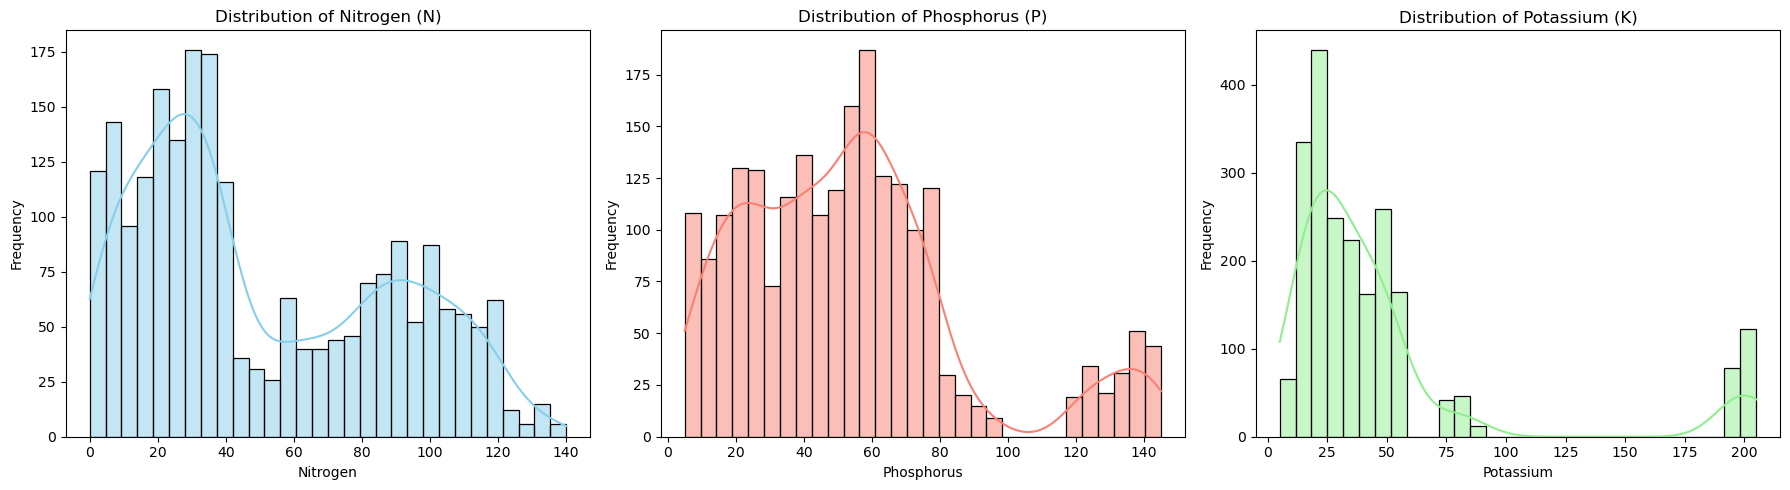

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Nitrogen (N)

sns.histplot(df['N'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Nitrogen (N)', fontsize=12)
axes[0].set_xlabel('Nitrogen')
axes[0].set_ylabel('Frequency')


# 2. Phosphorus (P)

sns.histplot(df['P'], kde=True, bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Phosphorus (P)', fontsize=12)
axes[1].set_xlabel('Phosphorus')
axes[1].set_ylabel('Frequency')


# 3. Potassium (K)

sns.histplot(df['K'], kde=True, bins=30, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Potassium (K)', fontsize=12)
axes[2].set_xlabel('Potassium')
axes[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


### Distribution Plot 

Plotting distribution of Nitrogen, Phosphorus, and Potassium fertilizers  
To see how the values spread out  

#### What we can observe:
- Nitrogen has two peaks → Two crop clusters with low & high N need  
- Phosphorus is right-skewed → Most crops need low P , Few crops need extreme Phosphorus levels (around 140)  
- Potassium shows extreme outliers → Special crops need very high K

#### code brief

This program shows three histograms horizontally side by side to illustrate the distributions of the **Nitrogen (N)**, **Phosphorus (P)**, and **Potassium (K)** values in the dataset. This program utilizes Seaborn and Matplotlib to draw the figures in a neat and organized way.

Every nutrient has its corresponding plot: sky blue for Nitrogen, salmon or pinkish for Phosphorus, and light green for Potassium. Histograms offer the relative frequency with which each value appears and a smooth line over the top (a KDE line) is drawn to help in visualization of the form of the data—spread far apart or the majority of the value close together in a range.

They also include titles and labels in their axes so they can easily be understood. Finally, `plt.tight_layout()` prevents the plots from overlapping and `plt.show()` displays them. They can easily indicate at a glance if any of the nutrients are too high, too low, or out of range and this is beneficial in developing insight and preparing the data for further analysis or a decision based upon it.

#### short
- We used Seaborn's histplot to create KDE for nutrition.
- kde=True menas overlays a smooth curve to show the distribution.
- plt.tight_layout() ensures proper spacing between the plots.

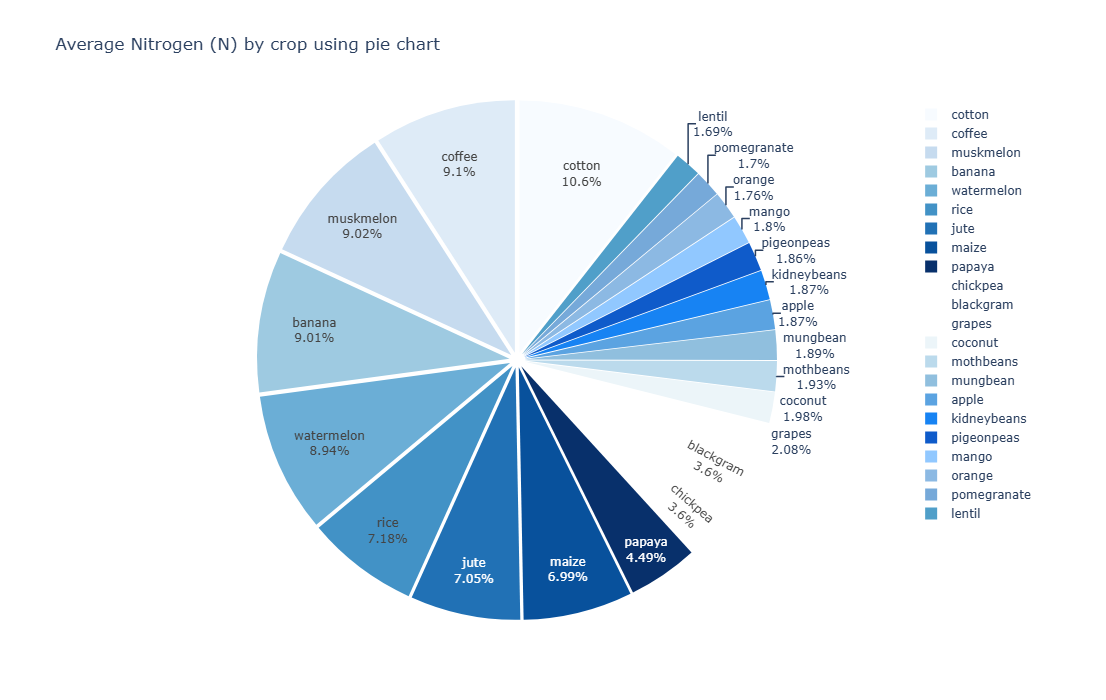

In [52]:
# averages in percentage Nitrogen by crop
n_total = df.groupby('label')['N'].mean().reset_index()
n_total.columns = ['Crop', 'Total_N']

# Plot as pie chart with color 
fig = px.pie(n_total, names='Crop', values='Total_N',
             title='Average Nitrogen (N) by crop using pie chart',
             color_discrete_sequence=px.colors.sequential.Blues)

fig.update_traces(textinfo='percent+label', pull=[0.03]*len(n_total)) #All slices are pulled out slightly for visual emphasis.

fig.update_layout(
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

### Pie Chart Purpose:
Visualize which crops type require how much percent of nitrogen on average value. 

#### Where can we use
To compare nutrient demand across crops  
Useful for fertilizer planning  

#### Key Observations:
Cotton has the highest nitrogen average (~10.6%) → Needs heavy nitrogen input.  
Coffee, Muskmelon, Banana also show high nitrogen demands (above 9% each).  
Blackgram, Chickpea, Papaya need relatively lower nitrogen (below 5%).  
Smaller slices indicate crops that are low nitrogen feeders, possibly leguminous or hardy.  

#### code explanations

This produces a pie chart illustration of the mean proportion of Nitrogen (N) absorbed by each crop type in the dataset. This begins with a grouping of the dataset by the crop (`label`) and the determination of the average Nitrogen value per crop using `groupby()` and `mean()`. This is saved in a new DataFrame, `n_total`, with two columns: crop name and its mean Nitrogen content.

Finally, `plotly.express.pie()` is used to plot the pie chart. Every crop is assigned a pie slice and each slice size is equal to the quantity of Nitrogen each crop needs on avg as a fraction of the remaining amount. The blues are applied as the palette so that it will look neat and businesslike, and `textinfo='percent+label'` will cause every pie to show crop and percent value.

To make the chart more presentable, all the wedges are slightly pushed out using the `pull` option. The background also gets white to make it easy to see and the height of the chart is adjusted to make it easily visible. Then `fig.show()` shows the interactive pie chart. The chart is easy to use when comparing crops that need more or less Nitrogen and thus it can be utilized in agriculture planning and analysis.
#### code in short
- the average Nitrogen (N) level for each crop using groupby() and visualizes the results in a pie chart using Plotly. 
- The chart is styled with color_discrete_sequence to apply a blue color gradient
- The textinfo='percent+label' option displays both the crop name and percentage.


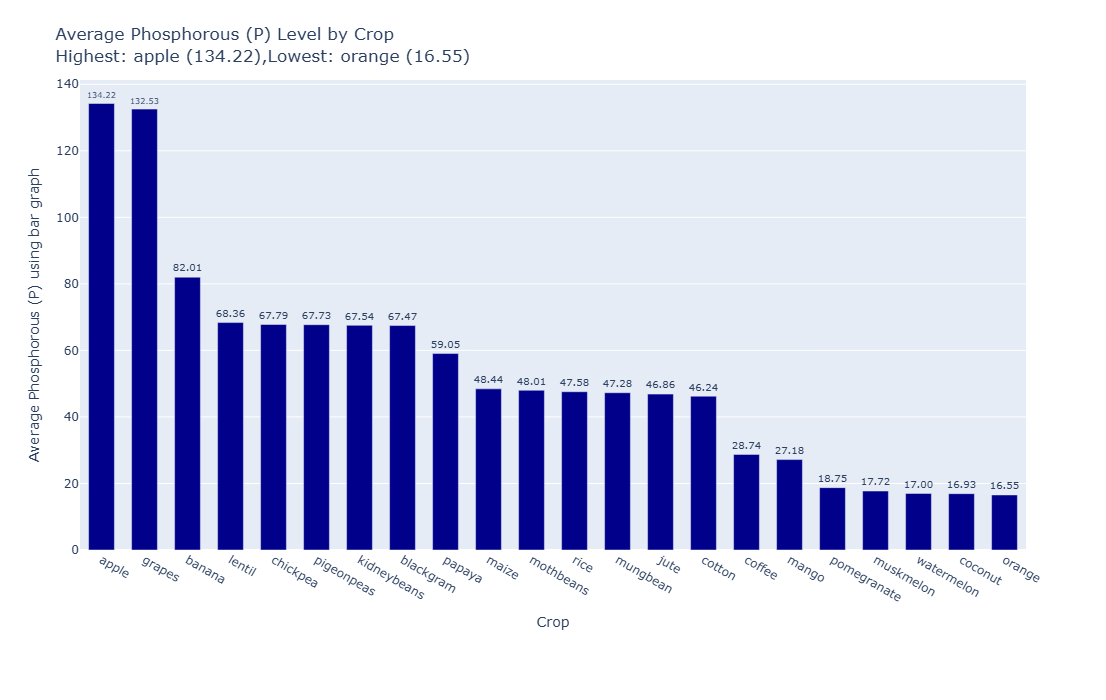

In [55]:
# Calculate average P for each crop
p_means = df.groupby('label')['P'].mean().sort_values(ascending=False).reset_index()
p_means.columns = ['Crop', 'Average_P']

# Identify highest and lowest crops with location.
highest_crop = p_means.iloc[0] # raw starting index 
lowest_crop = p_means.iloc[-1] 

# Ploting bar graph.
fig = px.bar(p_means, x='Crop', y='Average_P', text='Average_P',
             title=f"Average Phosphorous (P) Level by Crop<br>Highest: {highest_crop['Crop']} ({highest_crop['Average_P']:.2f}),Lowest: {lowest_crop['Crop']} ({lowest_crop['Average_P']:.2f})",
             color_discrete_sequence=['darkblue'])

fig.update_layout(
    xaxis_title='Crop',
    yaxis_title='Average Phosphorous (P) using bar graph',
    showlegend=False,
    height=700,
    margin=dict(t=80, b=150)
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside',
    width=0.6
)

fig.show()

### From Phosphorous Bar Chart  

#### Why that is used 
Shows ranking of crops by average phosphorus requirement  
Useful for nutrient-based crop planning  
Easy to spot extremes → apple (most) vs orange (least)

#### What this bar tell us 

Apple → 134.22	Needs the most phosphorus.
Grapes → 123.23	Also high demand.
Orange → 16.55	Needs the least phosphorus.

#### code brief

This script creates a bar chart to compare the average Phosphorus (P) level across each crop. This script first calculates the mean value of each crop and then sorts the crops in descending order. The crop with the highest and the lowest P level are labeled in the chart title.

With Plotly Express, each crop is depicted as a dark blue bar and the exact mean value is marked at the top of each bar. The chart is evenly labeled and spaced so that it is easy to read. This graph facilitates easy comparison at a glance of the amount of Phosphorus each crop typically requires.
#### code short 

- Using .iloc[0] and .iloc[-1], we calculated the average phosphorus (P) level for each crop, sorted the values in descending order, and identified the crop with the highest and lowest P levels.
- The bar creates texttemplate='%{text:.2f}' and is used to format the labels to two decimal places.

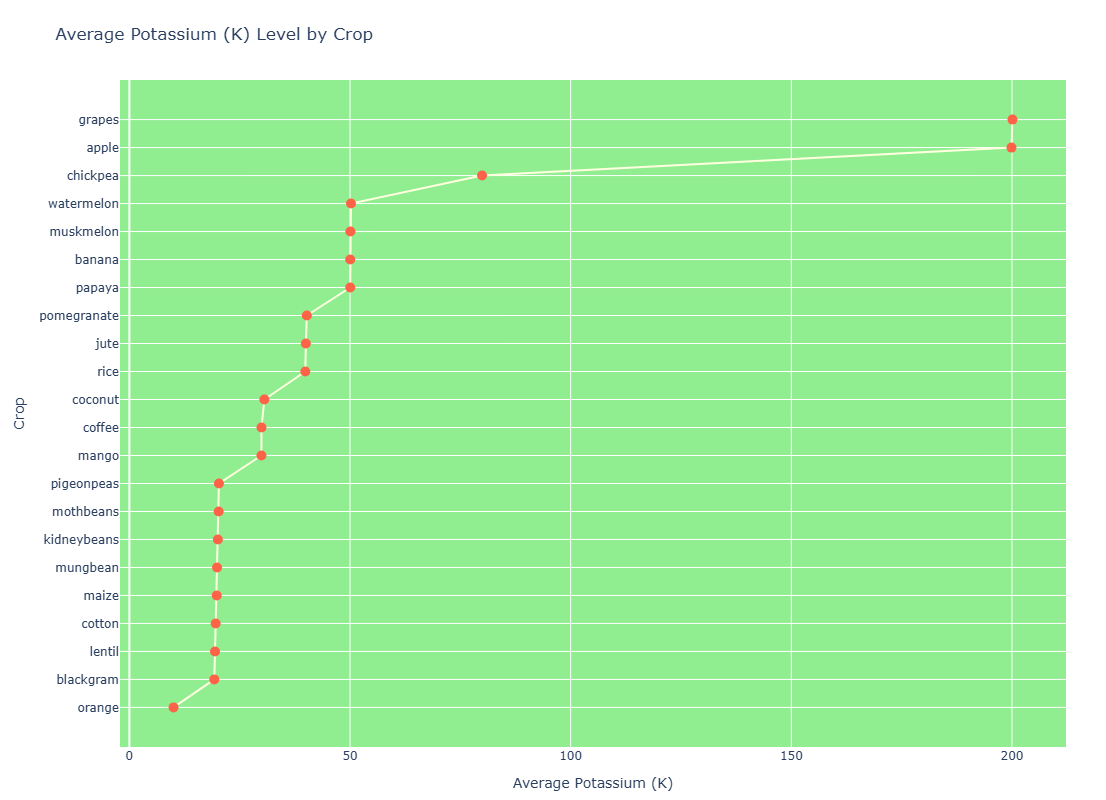

In [58]:
# Calculate mean K per crop
k_means = df.groupby('label')['K'].mean().sort_values(ascending=True).reset_index()
k_means.columns = ['Crop', 'Average_K']

# Create horizontal chart
fig = go.Figure()

# Add line graph
fig.add_trace(go.Scatter(
    x=k_means['Average_K'], y=k_means['Crop'],
    mode='lines+markers',
    marker=dict(color='tomato', size=10),
    line=dict(color='lightyellow', width=2),
    name='Average K'
))

# Customize layout
fig.update_layout(
    title=" Average Potassium (K) Level by Crop",
    xaxis_title="Average Potassium (K)",
    yaxis_title="Crop",
    height=800,
    margin=dict(l=120, r=40, t=80, b=40),
    showlegend=False,
    plot_bgcolor='lightgreen'
)

fig.show()


### Line Chart for Potassium (K) fertilizer 

#### Why this chart is used 
Lollipop charts are cleaner than bar charts for small data points.  
Easier to compare at a glance.  
Shows relative scale and exact value.  

#### What we can observe 
- Grapes, Apple → Need very high Potassium (around 200)  
- Chickpea, Watermelon → Have moderate K requirement (70 to 100)  
- Orange, Blackgram → Require very little Potassium (below 20)

#### code explanation
This program draws a line graph horizontally to depict the mean Potassium (K) value of each crop. This program calculates the mean K value for each crop and sorts the crops in terms of increasing order according to these values

A line graph is created using Plotly's go.Figure(), where each crop is allotted the y-axis and its corresponding mean Potassium value to the x-axis. A point is marked with a red dot (tomato) and connected using a pale yellow line.

The graph is green in hue and very open with crop labels and lacks a legend to make it simple and straightforward. This graph facilitates easy visualization to easily see at glance the crops requiring more or less Potassium
#### code in short
- average Potassium (K) level for each crop, sorts them in ascending order, and visualizes the result using a horizontal line chart created with Plotly’s go.Scatter.
- chart uses lines+markers mode to show both the data points and the connecting lines

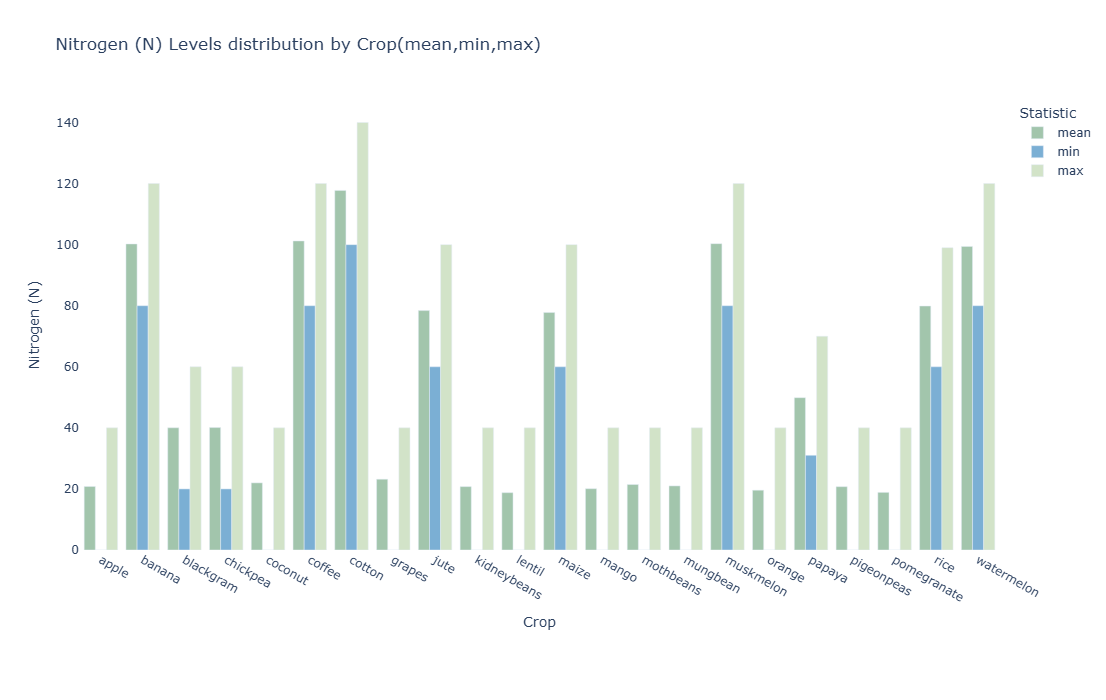

In [61]:
# Group and reshape data
n_summary = df.groupby('label')['N'].agg(['mean', 'min', 'max']).reset_index()
n_summary = n_summary.melt(id_vars='label', value_vars=['mean', 'min', 'max'],
                           var_name='Statistic', value_name='Nitrogen')

# Plot
fig_n = px.bar(n_summary, x='label', y='Nitrogen', color='Statistic',
               barmode='group',
               title='Nitrogen (N) Levels distribution by Crop(mean,min,max)',
               color_discrete_sequence=['#A2C5AC', '#7BAFD4', '#D2E3C8'])

fig_n.update_layout(
    xaxis_title="Crop",
    yaxis_title="Nitrogen (N)",
    height=700,
    margin=dict(b=150),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig_n.show()


### Group Bar plot for Nitrogen Fertilizer

#### Crops that Require High Nitrogen
Banana, Cotton, Watermelon, Rice, Coffee  
→ These crops have high mean N levels (around 100)  
→ Max values often reach 120–140  
→ Suitable for nutrient-demanding soil  

#### Crops with Moderate Nitrogen Needs  
Maize, Grapes, Jute, Lentil, Muskmelon  
→ Mean N values hover around 75–90  
→ Have visible min-max ranges, but within moderate zone  
→ Balanced nitrogen management is enough

#### Crops with Low Nitrogen Requirements  
Apple, Orange, Mango, Coconut, Pomegranate  
→ Mean N around 20–40  
→ Likely grow in less-fertilized or organic conditions  
#### coding overview for new fuctions.
This creates a **grouped bar chart** of **mean, minimum, and maximum Nitrogen (N) levels** across crops. This first aggregates the data and then calculates the mean, minimum, and maximum measurements of Nitrogen. Then it melts the data using `melt()` such that each crop is replicated with its Nitrogen measurements in separate rows.

In Plotly Express the graph shows grouped bars for each crop with varying colours to represent the mean value, min value, and max value. The layout is customized with white background and informative labels and added bottom padding to make reading crop names easier. The graph facilitates the easy comparison of the way Nitrogen levels differ across crops and the range of values within each crop.

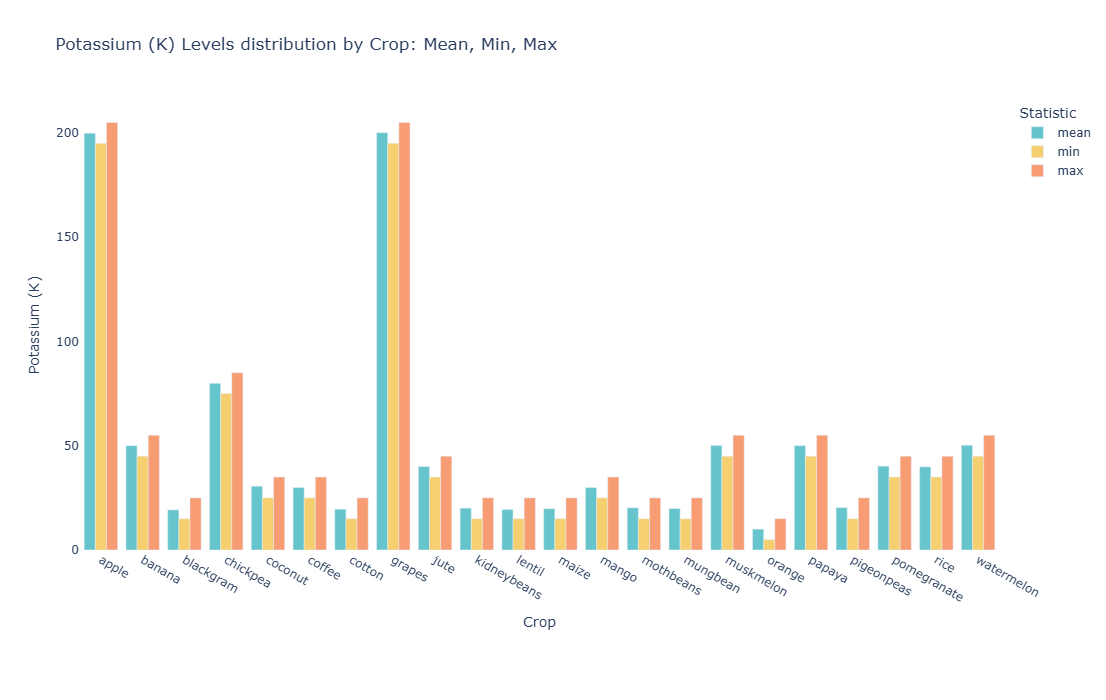

In [64]:
# Group and reshape data
k_summary = df.groupby('label')['K'].agg(['mean', 'min', 'max']).reset_index()
k_summary = k_summary.melt(id_vars='label', value_vars=['mean', 'min', 'max'],
                           var_name='Statistic', value_name='Potassium')

# Plot
fig_k = px.bar(k_summary, x='label', y='Potassium', color='Statistic',
               barmode='group',
               title='Potassium (K) Levels distribution by Crop: Mean, Min, Max',
               color_discrete_sequence=px.colors.qualitative.Pastel)

fig_k.update_layout(
    xaxis_title="Crop",
    yaxis_title="Potassium (K)",
    height=700,
    margin=dict(b=150),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig_k.show()


### Group Bar plot for Potassium (K) Fertilizer 

#### Crops with Very High Potassium Demand
Apple, Grapes  
→ Mean K values close to 200+  
→ Both min and max also very high → consistently K-hungry crops  

#### Crops with Moderate Potassium Needs
Banana, Coconut, Papaya, Muskmelon, Watermelon, Chickpea  
→ Mean K values between 50–100  
→ Balanced potassium range for growth  

#### Crops with Low Potassium Requirements
Cotton, Mothbeans, Orange, Maize, Mungbean, Kidneybeans, Pigeonpeas, Mango    
→ Mean values mostly around 20–40  
→ Very small difference between min and max  

#### code brief
This creates a grouped bar chart to display the mean, minimum, and maximum levels of Potassium (K) across crops. This first aggregates the data by crop and then calculates the average, the minimum, and the maximum Potassium levels. This then restructures the data using melt() such that every crop will have three rows for every statistic.

The graph is built using Plotly Express using soft pastel shades to differentiate the three values. Three bars are used to represent each crop in the x-axis and its Potassium values, and the graph is built using a simple white background and extra padding to accommodate the crop names. This graph is easy to use in comparing the difference in Potassium value across the crops and any interesting nutrient trends

- mean, min, and max Potassium (K) levels for each crop and reshapes the summary using melt(), making it suitable for grouped visual comparison

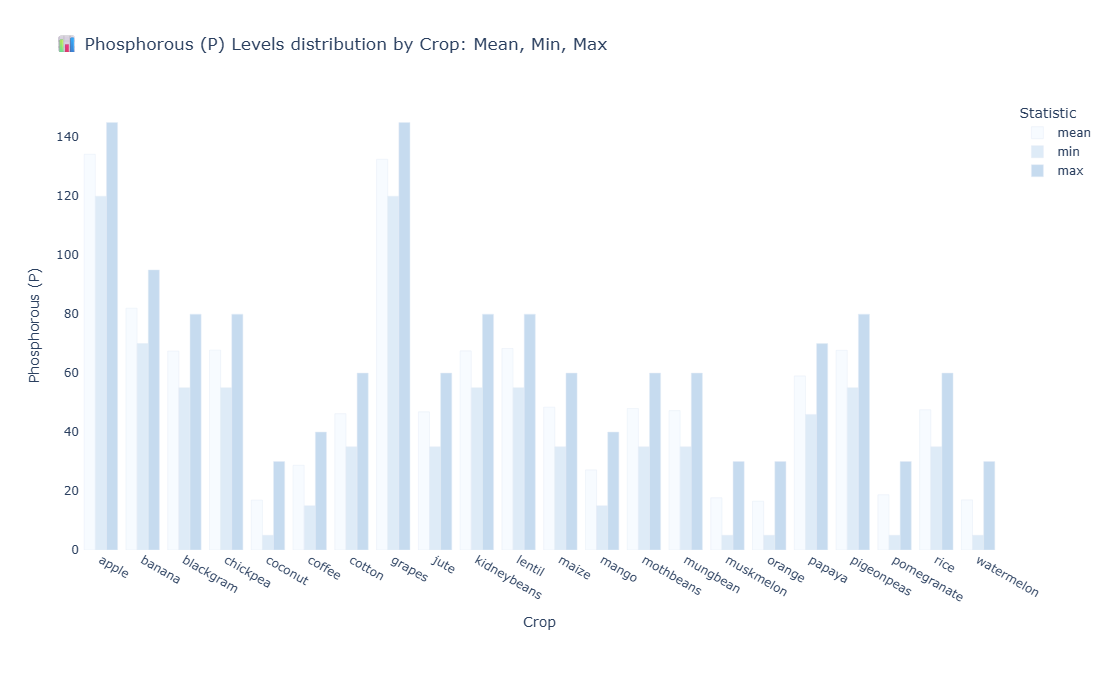

In [67]:
# Group and reshape data for P
p_summary = df.groupby('label')['P'].agg(['mean', 'min', 'max']).reset_index()
p_summary = p_summary.melt(id_vars='label', value_vars=['mean', 'min', 'max'],
                           var_name='Statistic', value_name='Phosphorous')

# Plot grouped bar chart
fig_p = px.bar(p_summary, x='label', y='Phosphorous', color='Statistic',
               barmode='group',
               title='📊 Phosphorous (P) Levels distribution by Crop: Mean, Min, Max',
               color_discrete_sequence=px.colors.sequential.Blues)

fig_p.update_layout(
    xaxis_title="Crop",
    yaxis_title="Phosphorous (P)",
    height=700,
    margin=dict(b=150),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig_p.show()


### Group Bar plot for Phosphorous Fertilizer 

#### Crops with Very High Phosphorus Demand
Apple, Grapes  
→ Mean P > 120  
→ Max values around 140+  

#### Crops with Moderate Phosphorus Needs
Banana, Blackgram, Chickpea, Lentil, Maize, Papaya  
→ Mean P between 60–90  
→ Balanced growth range  
→ Well-suited for general soil without needing special phosphorus treatment  

#### Crops with Low Phosphorus Requirements
Coconut, Mango, Mothbeans, Orange, Pomegranate, Muskmelon, Watermelon  
→ Mean P < 50  
→ Low P demand  
→ Some like Orange and Coconut show consistently low min-max values → stable low-P crops  

#### code brief

This will produce a grouped bar chart to display the mean, min, and max Phosphorous (P) levels across all the crops in the dataset. The code starts with the grouping of the dataset in crop and then the calculation of the three statistics—mean, min, and max—on the Phosphorous column. The summary is then melted using melt() so crop and its statistics can then easily be graphed.

With Plotly Express, the bar chart is presented with each crop being graphed as three bars across each statistic. Bars are graphed in different shades of blue to make them easily readable. Layout is tailored using axis labels as well as a pristine white background and extra margin at the bottom to avoid the names of crops being on top of each other.
- mean, min, and max Phosphorous (P) levels for each crop and reshapes the summary using melt(), making it suitable for grouped visual comparison


## Clustering  the values of N , P , K  by crop 
### This allowed grouping of crops with similar fertilizer needs.


C:\Users\pritp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



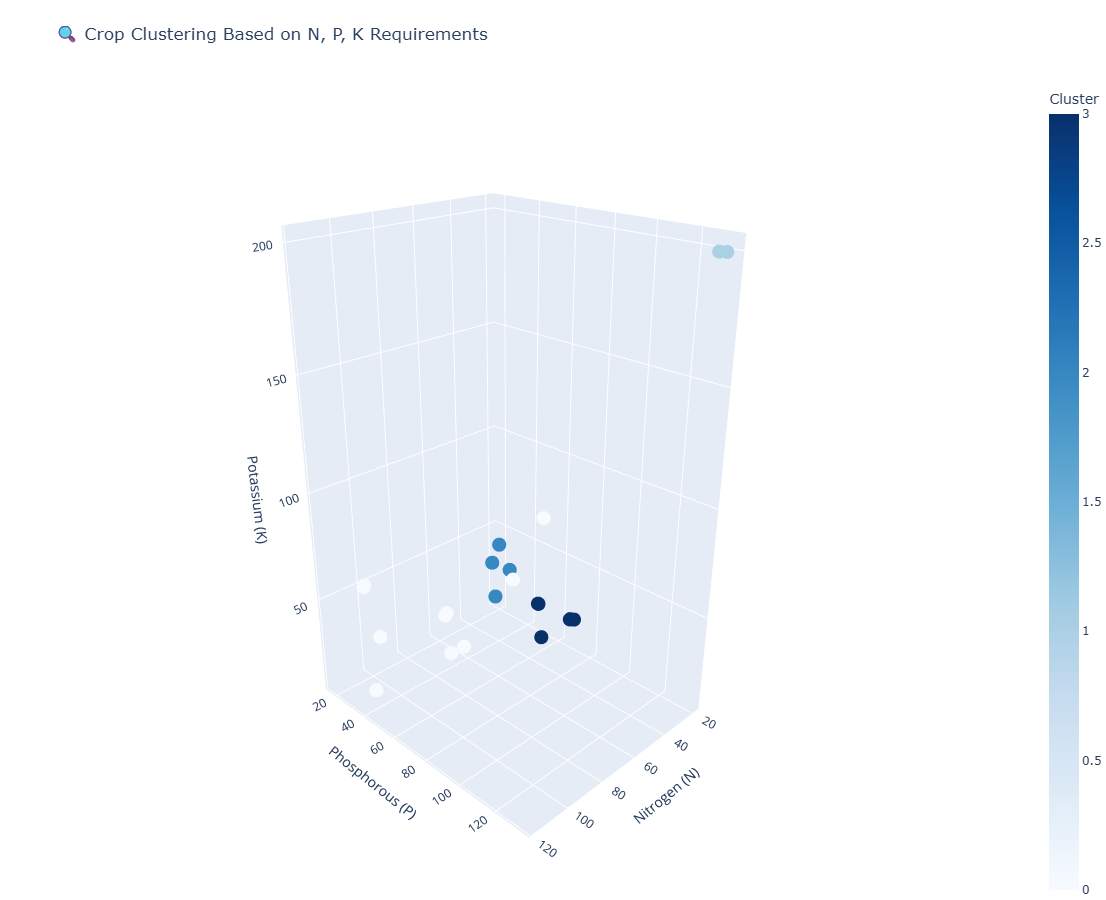

In [71]:
from sklearn.cluster import KMeans

# Step 1: Compute average NPK per crop
npk_avg = df.groupby('label')[['N', 'P', 'K']].mean().reset_index()

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
npk_avg['Cluster'] = kmeans.fit_predict(npk_avg[['N', 'P', 'K']])

# Step 3: Enhanced 3D Scatter Plot
fig = px.scatter_3d(npk_avg, x='N', y='P', z='K', color='Cluster',
                    hover_name='label',
                    title='🔍 Crop Clustering Based on N, P, K Requirements',
                    color_continuous_scale='Blues')

fig.update_layout(
    scene=dict(
        xaxis_title='Nitrogen (N)',
        yaxis_title='Phosphorous (P)',
        zaxis_title='Potassium (K)'
    ),
    height=900,  # Taller chart
    margin=dict(l=0, r=0, b=0, t=80),
    plot_bgcolor='white',
    paper_bgcolor='white',
    scene_camera=dict(eye=dict(x=1.8, y=1.8, z=1.2))  # zoomed out view
)

fig.show()


## K mean Clustering 

## 🔍 Interpretation of Clusters (3D Scatter plot)
By using KMeans clustering, each cluster represents a group of crops with similar nutrient (NPK) requirements.   

#### Cluster 0 – Low NPK Requirement
Avg N: 20.12 | P: 19.85 | K: 27.68  
These crops require very little nutrient input  
Suitable for low-fertility soil or organic farming  

#### Cluster 1 – Very High P & K, Low N
Avg N: 21.99 | P: 133.38 | K: 200.00  
These crops demand very high potassium and phosphorus, nitrogen is low.  
Need specialized fertilizers and well-managed soil

#### Cluster 2 – High Nitrogen, Moderate P & K
Avg N: 94.37 | P: 41.82 | K: 37.44  
Soil must be rich or heavily supplemented in N  

#### Cluster 3 – Moderate NPK Need (Balanced)
Avg N: 29.08 | P: 61.65 | K: 31.13  
Moderate requirement for all nutrients  
Suitable for well-balanced soil

#### coding perspective
This script groups crops according to their mean Nitrogen (N), Phosphorous (P), and Potassium (K) requirement. This script begins by computing the mean NPK values of the crops. Subsequently, it applies the KMeans method to partition the crops into four categories based upon the means.

Finally, it makes a 3D scatter plot with each crop located in 3D space based on its N, P, and K value. Crops are shaded based on their cluster membership, and this facilitates visualization of clustering crops sharing similar nutritional needs. The zoomed out camera viewpoint and structured and clean graph layout are featured in the interactive graph to make exploration and comparison simpler.

kmeans = KMeans(n_clusters=4, random_state=42), in this we create kmeans with number of 4 cluster and random state means, ensuring reproducibility of results.

## Feature Engineering
### 1) Bining


#### PH Bining

#### PH feature into a categorical ph_level, and this allows me to communicate using clear soil types—acidic, neutral, or alkaline—enhancing both model accuracy and user understanding.”

In [74]:
def classify_ph(ph):
    if ph < 6.5:
        return 'Acidic'
    elif ph <= 7.5:
        return 'Neutral'
    else:
        return 'Alkaline'

df['ph_level'] = df['ph'].apply(classify_ph)


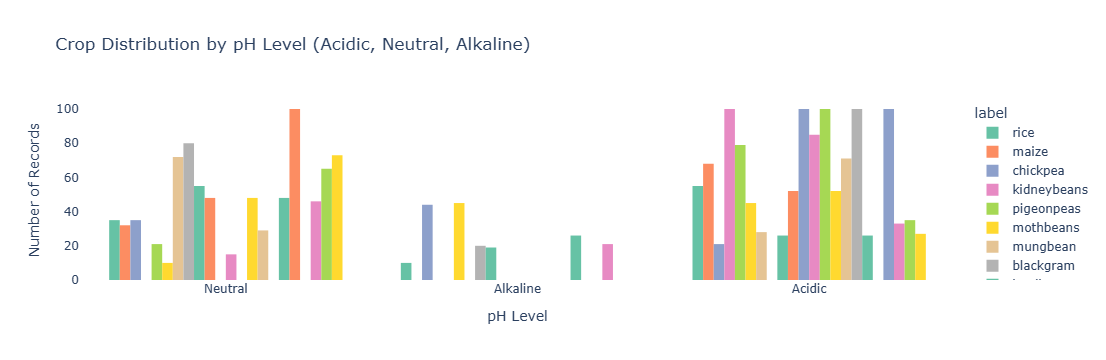

In [76]:
fig_ph = px.histogram(df, x='ph_level', color='label', barmode='group',
                      title='Crop Distribution by pH Level (Acidic, Neutral, Alkaline)',
                      color_discrete_sequence=px.colors.qualitative.Set2)
fig_ph.update_layout(xaxis_title='pH Level', yaxis_title='Number of Records',
                     plot_bgcolor='white', paper_bgcolor='white')
fig_ph.show()


###  Key Observations

#### Neutral pH Range (6.5–7.5):
A moderate number of records appear here.  
Crops like papaya, muskmelon, orange, and coffee  
Fruit crops prefer more balanced pH.

#### Alkaline pH Range (> 7.5):
Very few crop records are found here.  
Only a small presence of coffee, coconut, and some apples appears in this range.  
Alkaline soil is not generally suitable for most crops

#### Acidic pH Range (< 6.5):
The largest number of crop samples fall under this category.   
Crops like jute, cotton, apple, and coconut  
Acidic soil is ideal for most crops in the dataset. 

### Code explaining

It categorizes **pH levels** of soil into three ranges: **Acidic**, **Neutral**, and **Alkaline**, based on standard pH ranges. This uses a predefined `classify_ph()` function for categorizing every record in the data, and these new categorizations go into a new column called `'ph_level'.

It then creates a **grouped histogram** using Plotly Express showing distribution of the different crops in these ranges of pH. All crops are colored differently and grouped based on pH. The background is white in color and has labeled axes, making it easy to see what crops like what type of soil based on pH.

### Rainfall Bining
##### This transformation allows the model to reason in terms of environmental suitability (e.g., high or low rainfall regions), supports rule-based logic, and improves visualization clarity during EDA.”

In [78]:
def classify_rainfall(rain):
    if rain < 100:
        return 'Low'
    elif rain <= 200:
        return 'Moderate'
    elif rain <= 300:
        return 'High'
    else:
        return 'Very High'

df['rainfall_level'] = df['rainfall'].apply(classify_rainfall)


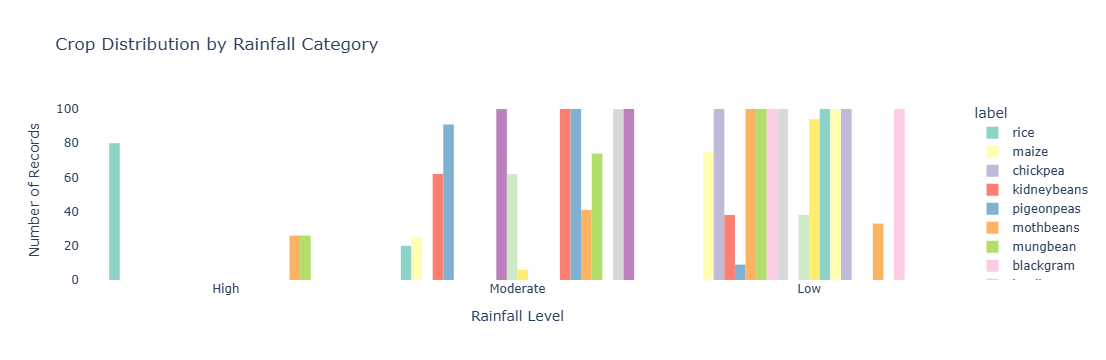

In [80]:
fig_rain = px.histogram(df, x='rainfall_level', color='label', barmode='group',
                        title='Crop Distribution by Rainfall Category',
                        color_discrete_sequence=px.colors.qualitative.Set3)
fig_rain.update_layout(xaxis_title='Rainfall Level', yaxis_title='Number of Records',
                       plot_bgcolor='white', paper_bgcolor='white')
fig_rain.show()


### Interpretation of Crop Distribution by Rainfall Category

#### 1. High Rainfall (200–300 mm):
- Only Rice is dominant in this category.
- These crops requires significantly more water and grows well in wet conditions.

#### 2. Moderate Rainfall (100–200 mm):    
- Several crops prefer this range.  
- Notable ones: Kidneybeans, Pigeonpeas, Blackgram, Maize, Mungbean.
 
#### 3. Low Rainfall (<100 mm):  
- Most crops fall under this category.  
- Includes Chickpea, Blackgram, Maize, Mothbeans, and Mungbean.  
- These are likely drought-resistant.

#### Code Explanation
Here, this code categorizes values for rainfall into four categories: **Low**, **Moderate**, **High**, and **Very High**. The classification for each record is done using a user-defined function `classify_rainfall()`, and the results are output in a new column called `'rainfall_level'`.

It then makes a **grouped histogram** representation of distribution of different crops across these rainfall ranges. Different crops are colored, making comparison between which crops are being planted under which conditions easy. There are useful titles, labeled axes, and a clean white background for legibility.


In [82]:
df.head(100)

N   P   K  temperature   humidity        ph    rainfall label  ph_level  \
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice   Neutral   
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice   Neutral   
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice  Alkaline   
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice   Neutral   
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice  Alkaline   
..  ..  ..  ..          ...        ...       ...         ...   ...       ...   
95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice   Neutral   
96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice   Neutral   
97  60  55  45    21.408658  83.329319  5.935745  287.576694  rice    Acidic   
98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice   Neutral   
99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice    Acidic   

   rainfall_level  
0            High  
1            High  
2            High  
3            High  
4            High  
..            ...  
95       Moderate  
96           High  
97           High  
98       Moderate  
99       Moderate  

[100 rows x 10 columns]

Here are two new columns for analysis and helpful in future processes.

#### “The scatter plot between humidity and temperature reveals crop-specific climate preferences. Crops like cotton and sugarcane cluster around high humidity and high temperature, while others such as lentils and mothbeans favor cooler, drier conditions. This helps us visually confirm the environmental suitability zones for different crops.”

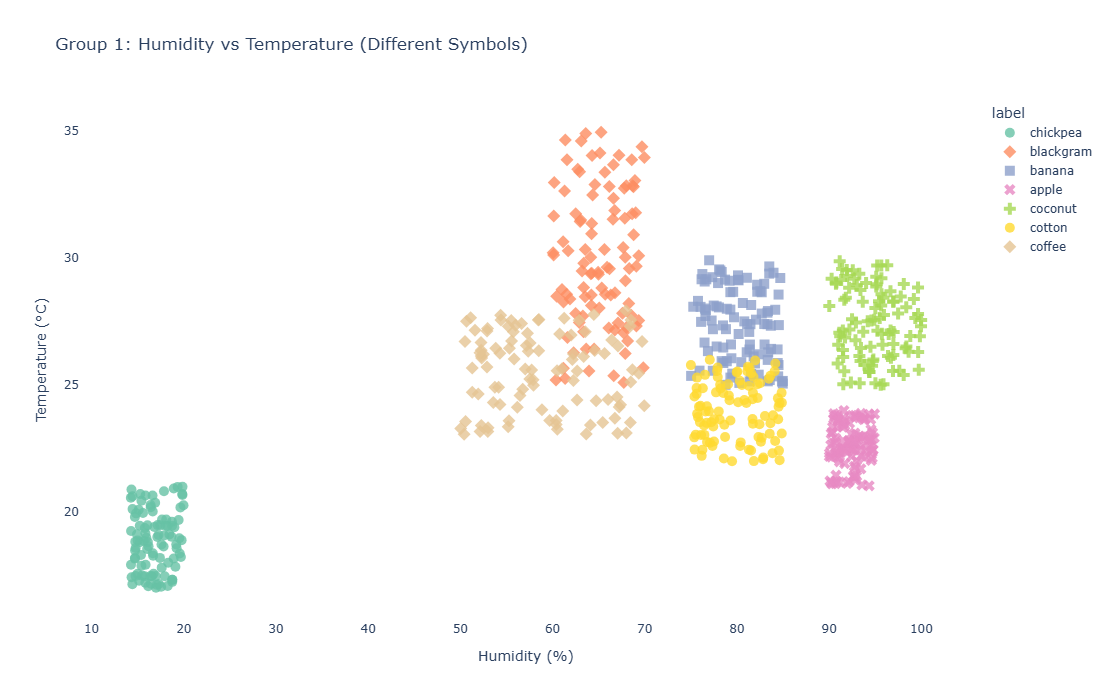

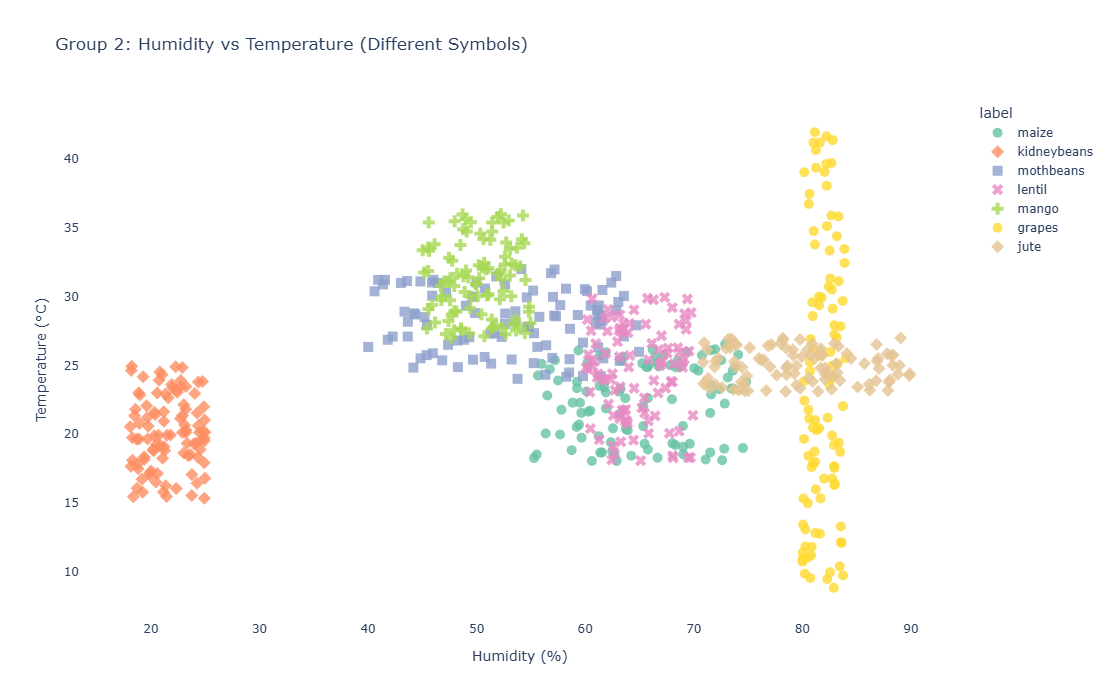

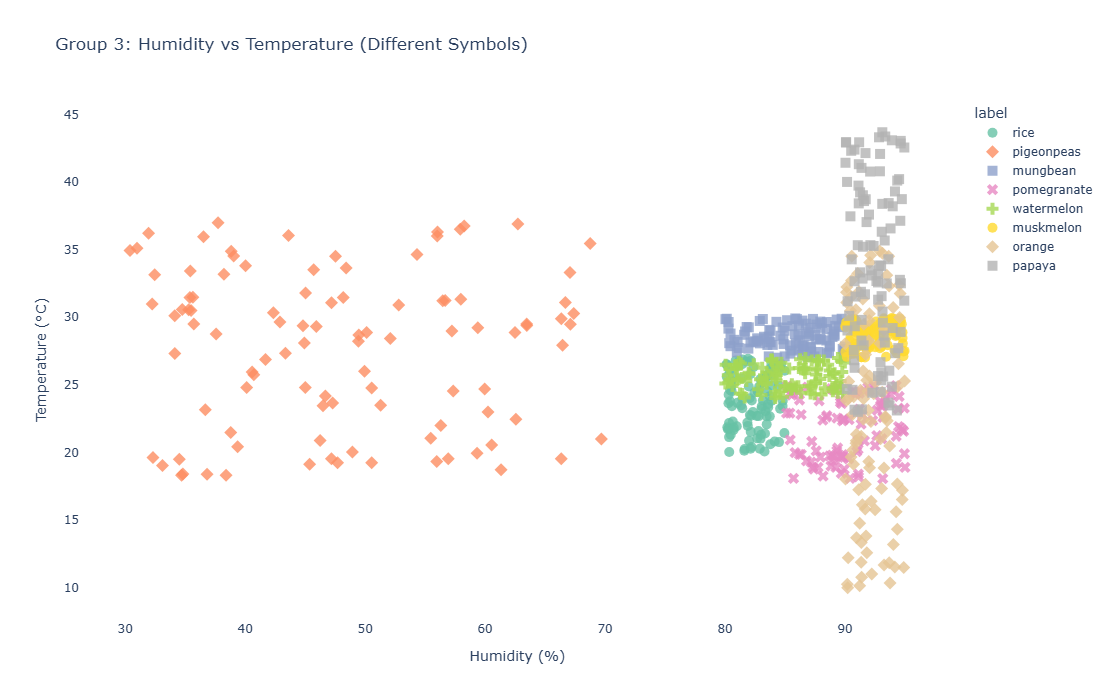

In [84]:
# Split crops into 3 groups: 7, 7, 8 crops
unique_crops = sorted(df['label'].unique())
crop_groups = [unique_crops[:7], unique_crops[7:14], unique_crops[14:]] # indexing 

# Create and display 3 plots
for i, group in enumerate(crop_groups):
    subset = df[df['label'].isin(group)]
    fig = px.scatter(subset, x='humidity', y='temperature',
                     color='label', symbol='label',
                     title=f'Group {i+1}: Humidity vs Temperature (Different Symbols)',
                     labels={'humidity': 'Humidity (%)', 'temperature': 'Temperature (°C)'},
                     opacity=0.8,
                     color_discrete_sequence=px.colors.qualitative.Set2)
    
    fig.update_traces(marker=dict(size=10))
    fig.update_layout(height=700, plot_bgcolor='white', paper_bgcolor='white')
    fig.show()


### Interpretation of the Humidity vs Temperature plots

#### Group 1: chickpea, blackgram, banana, apple, coconut, cotton, coffee
- **Chickpea**: very low humidity (10–20%), cooler temperatures (17–21°C)    
  Drought-tolerant and thrives in dry environments  
- **Blackgram & Coffee** : moderate humidity (50–70%), mid-range temperature (25–30°C)  
  Suitable for semi-dry tropical climates  
- **Banana, Coconut, Cotton, Apple**: high humidity (80–100%), warm to mild temperatures  
  Require moist environments, with some variation in temperature preference  

#### Group 2: maize, kidneybeans, mothbeans, lentil, mango, grapes, jute
- **Kidneybeans**: low humidity (20–30%), moderate temperature (18–25°C)    
  Performs well in drier conditions  
- **Maize, Mothbeans, Lentil**: moderate humidity (40–70%), temperature (22–30°C)  
  Adaptable to semi-arid and sub-tropical zones  
- **Mango, Grapes, Jute**: high humidity (70–90%)   
  Favor warm and humid climates, typical of tropical and monsoon regions  

#### Group 3: rice, pigeonpeas, mungbean, pomegranate, watermelon, muskmelon, orange, papaya  
- **Rice, Mungbean, Watermelon, Muskmelon**: very high humidity (85–100%), warm temperatures (22–28°C)  
  Thrive in moisture-rich environments, ideal for monsoon cultivation  
- **Pigeonpeas**: moderate humidity, broad temperature range (20–35°C)  
  Suited to variable climates  
- **Pomegranate, Orange, Papaya**: high humidity    
  Well-suited for hot, humid, and tropical zones

#### Code Overview 
The code splits the crops into three small categories for easy readability of information. There are multiple crops in every category, and for every category, a **scatter plot** is created showing the relationship between **humidity** and **temperature**.

All crops from all plots are depicted in different **shapes and hues** in order to clearly distinguish one from another. **Humidity (%)** is plotted along the x-axis while **temperature (°C)** is along y-axis. Points in the graph are made transparent and magnified for better clarity.

Each plot is clearly marked and neat, and we can see how each group of plants responds to each different humidity and temperature condition. It's a good way of being able to see patterns without getting lost among too many plants in one block.


 - code splits the dataset into three crop groups (7, 7, and 8 crops) using slicing on sorted unique crop names. It then creates three separate scatter plots, each showing the relationship between humidity and temperature for one group.
 - Plotly’s px.scatter is used with distinct symbols and colors for each crop, and color_discrete_sequence=Set2 ensures visually distinct markers.
 - The marker.size and opacity enhance visibility, and each chart is neatly formatted with a white background and clear axis labels.

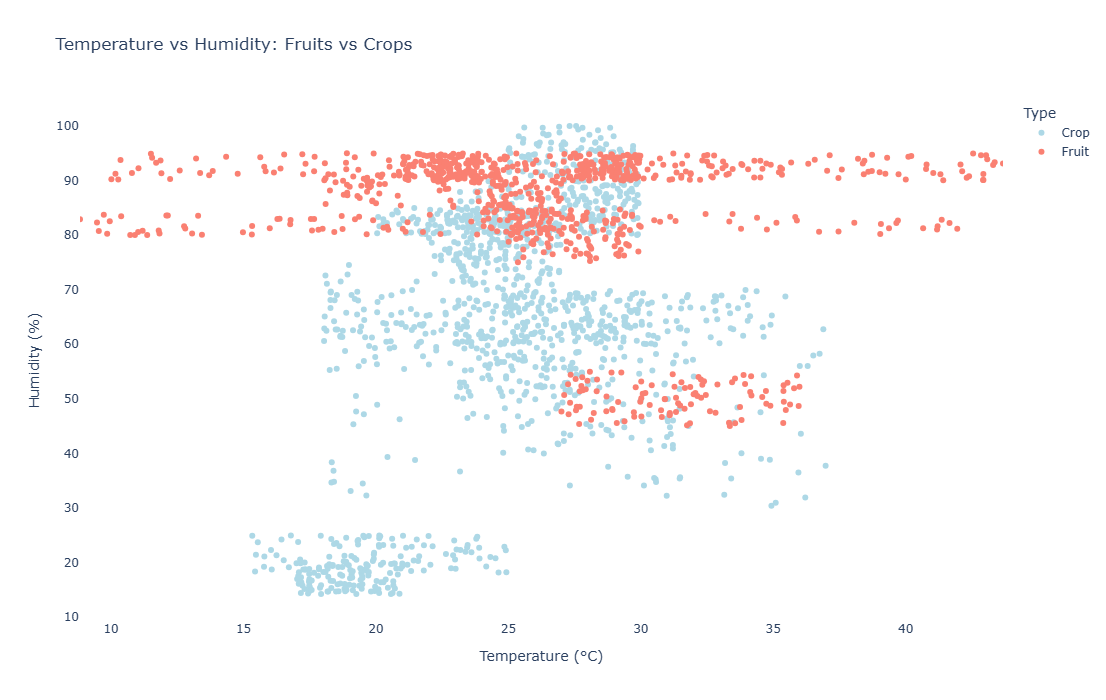

In [86]:
# Categorize into Fruit vs Crop
fruit_crops = ['mango', 'apple', 'grapes', 'banana', 'orange', 'pomegranate', 'papaya', 'watermelon', 'muskmelon']
df['type'] = df['label'].apply(lambda x: 'Fruit' if x in fruit_crops else 'Crop')

# Create strip plot for humidity vs temperature comparison
fig = px.strip(df, x='temperature', y='humidity', color='type', hover_name='label',
               title="Temperature vs Humidity: Fruits vs Crops",
               stripmode='overlay',
               color_discrete_map={'Crop': 'lightblue', 'Fruit': 'salmon'})

fig.update_layout(
    xaxis_title="Temperature (°C)",
    yaxis_title="Humidity (%)",
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title="Type"
)

fig.show()


### Temperature vs Humidity: Fruits vs Crops
we are just normally checking difference between crop and fruits temperature and humidity.
#### Fruits (mango, banana, orange, papaya):
High humidity (80–100%), wide temperature range (10–42°C)  
➤ Thrive in consistently moist, warm-to-hot climates

#### Crops (chickpea, maize, lentil):
Broad humidity range (20–100%), moderate temperatures (18–30°C)  
➤ More adaptable to both dry and moist environments

#### code 
This code categorizes all crops in the dataset as a **Fruit** or a **Crop** based upon its name. It does this by checking if the crop name is in a pre-loaded list of fruits, and stores the result within a new column called `'type'`.

It then creates a **stripplot** of **temperature** and **humidity** levels for Fruits and crops. Each point within the plot is a record from the data and **colour has been applied to differentiate Fruits (salmon) from **Crops (light blue)**. The `stripmode='overlay'` allows for them to be plotted within the same plot, making comparison easier for Fruits and Crops under their preferred conditions for growth.

The graph is well labeled, has a legend, and has a clean background, making for easy observation of trends in the correlation between temperature and humidity for each crop.
- The dataset is either "Fruit" or "Crop" based on the label column using a custom list and apply() function.
- It then creates a strip plot with Plotly to compare temperature vs humidity for these two categories. The stripmode='overlay' visually stacks data points to show overlap, and custom colors are assigned using color_discrete_map.

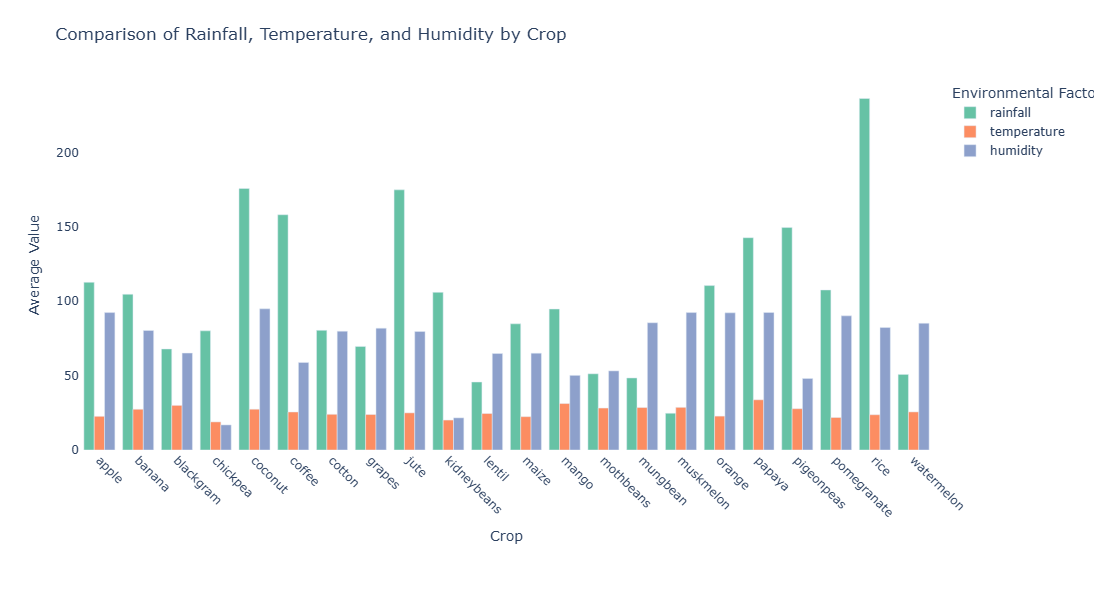

In [88]:
# Step 1: Group and summarize by crop
crop_summary = df.groupby('label')[['rainfall', 'temperature', 'humidity']].mean().reset_index()

# Step 2: Melt for better plot structure
melted = crop_summary.melt(id_vars='label', value_vars=['rainfall', 'temperature', 'humidity'],
                           var_name='Environmental Factor', value_name='Average Value')

# Step 3: Create bar chart
fig = px.bar(melted, x='label', y='Average Value', color='Environmental Factor',
             barmode='group',
             title="Comparison of Rainfall, Temperature, and Humidity by Crop",
             color_discrete_sequence=px.colors.qualitative.Set2)

# Styling
fig.update_layout(
    xaxis_title="Crop",
    yaxis_title="Average Value",
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=80, b=150),
)

fig.update_xaxes(tickangle=45, showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


## Comparison of Rainfall, Temperature, and Humidity by Crop

#### Crops with High Rainfall Needs:
###### (Coconut,  Jute,  Rice, Papaya)  
➤ Require significantly more rainfall (above 150 mm) for optimal growth  

#### Crops with High Humidity Tolerance:
###### (Banana, Grapes,  Muskmelon,  Orange)  
➤ Thrive in humid climates (above 90%)  

#### Crops Adapted to Low Rainfall & Humidity:
###### ( Chickpea,  Lentil, Mothbeans) 
➤ Perform well in lower water and humidity levels  

#### Code explanation
The code above will output a **grouped bar chart** showing the average **rainfall**, **temperature**, and **humidity** for each crop. This piece of code first calculated the average value for three environmental factors for each crop using `groupby()`. The data is then converted into a plot-ready format using `melt()`.

It employs Plotly Express for creating a colored slanted bar plot in which all crops have **three bars** for each factor. Rainfall, temperature, and humidity are colored differently. The background is white, and slanted crop labels are employed for legibility purposes without grid lines for a clean look.

The graph enables simple comparison of the response of various crops under environmental conditions, making it easy to spot trends or individualized needs among crops.




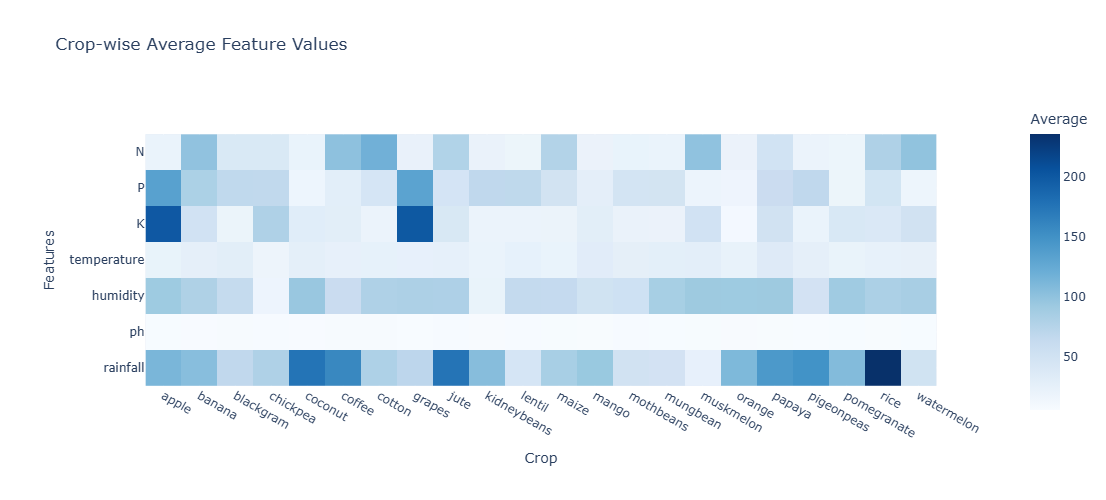

In [90]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_means = df.groupby('label')[features].mean().reset_index()

fig = px.imshow(
    crop_means.set_index('label').T,
    labels=dict(x="Crop", y="Features", color="Average"),
    title="Crop-wise Average Feature Values",
    color_continuous_scale="blues"  # Change color scale here
)

fig.update_layout(width=1000, height=500)
fig.show()


## Crop-wise Average Feature Heatmap

##### High Nutrient Demand Crops: ( Grapes,  Coconut, Jute)
➤ Show darker shades in N, P, K rows → indicate high fertilizer need

##### Water-Intensive Crops: ( Rice,  Watermelon,  Papaya)
➤ Deep blue in the rainfall row → rely on heavy water availability

##### Humidity-Loving Crops: ( Banana,  Orange,  Muskmelon)
➤ Highlighted in the humidity row → prefer moist environments

##### Low-Input/Dry-Resilient Crops: ( Chickpea,  Lentil,  Mothbeans)
➤ Lighter cells across rows → less dependent on water or fertilizer

### Coding part 
This code generates a **heatmap** of the **means of important features**—Nitrogen (N), Phosphorous (P), Potassium (K), temperature, humidity, pH, and rain—are for all crops. It first computes these means for all crops by using `groupby()`.

We then flip over the data such that **features along the y-axis** and **crops along the x-axis** because this makes it easy to compare feature values across crops. We use Plotly Express's `imshow()` for plotting a heatmap and employ a **blue color scale** for value intensity—darker color for higher values.

The table is displayed in wide format for easy readability and is useful for spotting patterns or inconsistencies between how various crops respond to climatic and soil conditions.
- average values of key features (like N, P, K, temperature, humidity, pH, and rainfall) for each crop and visualizes them using a heatmap with px.imshow()
-  The data is transposed using .T so that features appear on the y-axis and crops on the x-axis, making it easier to compare.


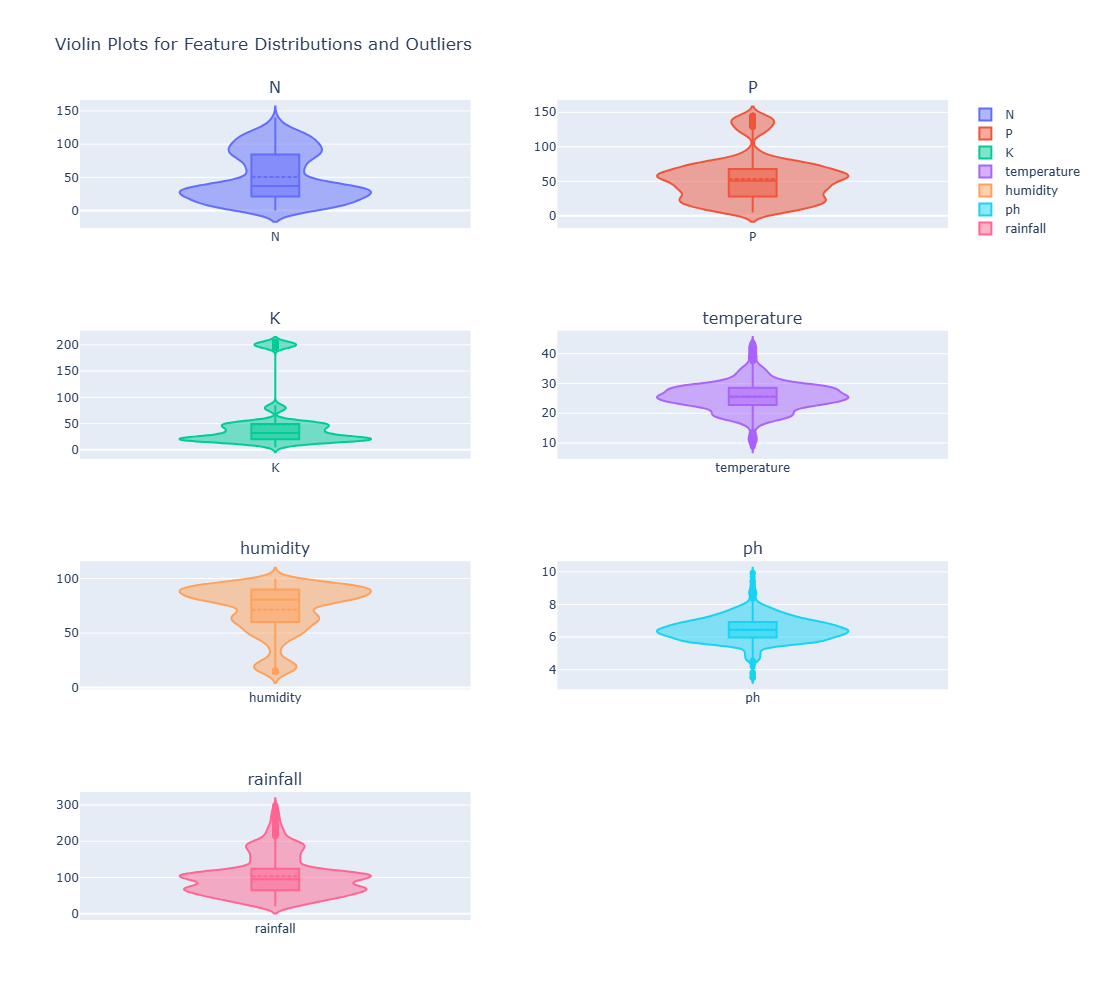

In [92]:
fig = make_subplots(rows=4, cols=2, subplot_titles=features)
row, col = 1, 1
for feature in features:
    fig.add_trace(
        go.Violin(y=df[feature], name=feature, box_visible=True, meanline_visible=True),
        row=row, col=col
    )
    col += 1
    if col > 2:
        col = 1
        row += 1
fig.update_layout(height=1000, width=800, title_text="Violin Plots for Feature Distributions and Outliers")
fig.show()

## Violin Plot Summary: Feature Distributions and Outliers

#### Nutrient Features
N (Nitrogen)
Wide spread with two distinct peaks (bimodal)  
Some outliers at the higher end  
Suggests crops are divided between low-N and high-N requirements  

P (Phosphorus)
Skewed slightly right, many values concentrated in the mid-range (40–60)  
Long tail and outliers indicate some crops require very high P levels

K (Potassium)
Highly skewed with dense low-range values and sharp peaks  
One major outlier (above 200) indicates a specialized high-K crop   

#### Environmental Factors
Temperature
Relatively compact, centered around 24–28°C  
Stable across crops — no extreme outliers
Most crops thrive in moderate temperatures

Humidity
Slight right skew, wide spread  
Varies a lot — from low to very high (15%–95%)  
Crops differ greatly in humidity tolerance  

pH
Bell-shaped and symmetric around 6.2  
Majority of values are neutral to slightly acidic  
Soils used are generally neutral, supporting a wide range of crops

Rainfall
Long tail and several outliers  
Most crops get 50–150 mm, but a few need >250 mm ⛈️  
Rice and similar crops dominate the high-rainfall group

#### Code

This code generates a **heatmap** of the **means of important features**—Nitrogen (N), Phosphorous (P), Potassium (K), temperature, humidity, pH, and rain—are for all crops. It first computes these means for all crops by using `groupby()`.

We then flip over the data such that **features along the y-axis** and **crops along the x-axis** because this makes it easy to compare feature values across crops. We use Plotly Express's `imshow()` for plotting a heatmap and employ a **blue color scale** for value intensity—darker color for higher values.

The table is displayed in wide format for easy readability and is useful for spotting patterns or inconsistencies between how various crops respond to climatic and soil conditions.

- Generates violin plots for all key features (N, P, K, temperature, humidity, pH, rainfall) using go.Violin to visualize data distribution and outliers.
- Subplots are organized in a 4-row by 2-column grid using make_subplots, with each plot titled by feature.

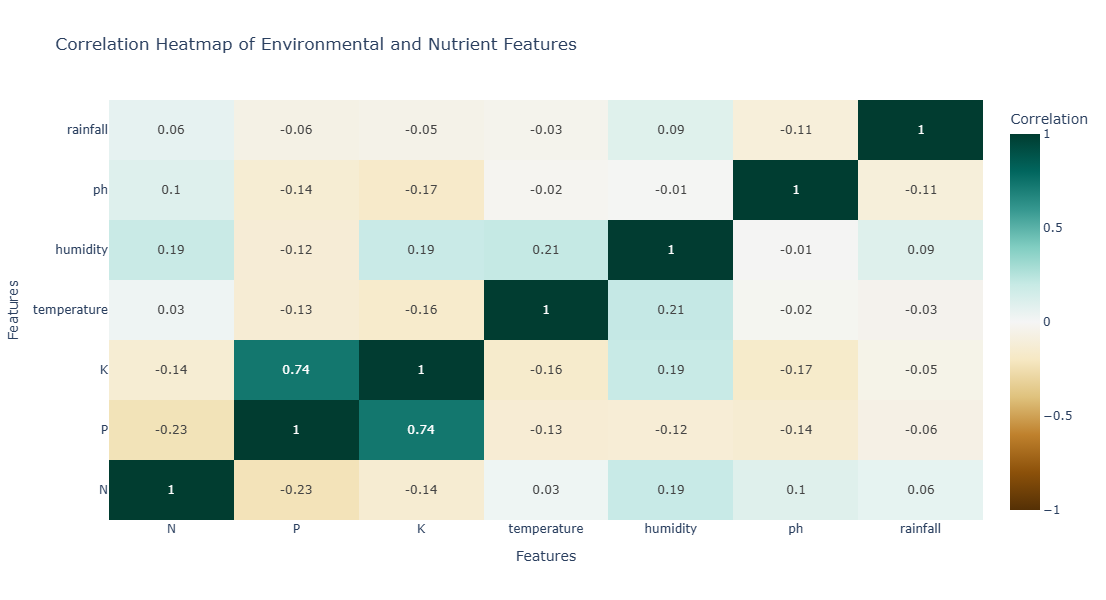

In [94]:
# Compute correlation matrix
correlation_matrix = df[features].corr()

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='brbg',
    colorbar=dict(title='Correlation'),
    zmin=-1, zmax=1, text=np.round(correlation_matrix.values, 2),  # Round correlation values
    texttemplate="%{text}" # Show the text
))

fig.update_layout(
    title="Correlation Heatmap of Environmental and Nutrient Features",
    height=600,
    xaxis_title="Features",
    yaxis_title="Features",
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


## Correlation Heatmap Insights: Environment Vs Nutrients

#### Strong Positive Correlations
1. Phosphorus (P) & Potassium (K) ≈ +0.6  
➤ Crops high in P tend to also require more K

#### Weak to Moderate Positive Correlations
1. Humidity & Temperature ≈ +0.3  
➤ Warmer crops slightly tend to require more humidity.  

2. Humidity & K / P / N ≈ +0.1 to +0.2  
➤ Minimal relation; humidity does not strongly drive nutrient needs.  

3. pH shows very weak or near-zero correlation with most variables  
➤ Indicates soil acidity is independent of nutrient or climate values in this dataset.

#### No Strong Negative Correlations
1. All off-diagonal values are between -0.1 and +0.6   
➤ No serious inverse dependencies. Features vary mostly independently.

#### Code examination 
This piece of code creates a **correlation heatmap** indicating how highly different environmental and nutrient factors—Nitrogen (N), Phosphorous (P), Potassium (K), temperature, humidity, pH, and rain—are correlated with each other.

It first calculates the **correlation matrix**, which gives results between -1 and 1. A high positive correlation is 1 and a high negative correlation is -1, while results close to 0 imply that there is no high correlation.

It then plots the matrix as a colored grid using Plotly's `Heatmap`. It utilizes `brbg` color scale for representing direction and magnitude of each relationship, and each cell has the correlation value rounded for legibility within it.

The heatmap has axis tick marks, axis labels, and a clear background, and has several corresponding features easily discernible from one another. This facilitates interpretation in terms of how variables should impact each other for environmental surveillance or crop prediction.


## Machine Learning Model to Recommendation 

In [96]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label  ph_level  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   Neutral   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   Neutral   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice  Alkaline   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   Neutral   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice  Alkaline   

  rainfall_level  type  
0           High  Crop  
1           High  Crop  
2           High  Crop  
3           High  Crop  
4           High  Crop

In [98]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define features and target
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'label'

X = df[features]
y = df[target]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features for models like Logistic Regression & KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42, shuffle=True)

# Define model dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# Evaluate models
model_names = []
accuracies = []

print("Model Performance Comparison:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    print(f"{name}: {acc:.4f}")

# Summary DataFrame
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

print("\nAccuracy Summary:")
print(accuracy_df)


Model Performance Comparison:

Logistic Regression: 0.9642
Decision Tree: 0.9725
XGBoost: 0.9793
Gradient Boosting: 0.9848
K-Nearest Neighbors: 0.9628
Random Forest: 0.9931

Accuracy Summary:
                 Model  Accuracy
5        Random Forest  0.993113
3    Gradient Boosting  0.984848
2              XGBoost  0.979339
1        Decision Tree  0.972452
0  Logistic Regression  0.964187
4  K-Nearest Neighbors  0.962810


#### Model Evaluation Summary
To identify the best model for crop prediction, six classification algorithms were tested using features like Nitrogen, Phosphorus, Potassium, temperature, humidity, pH, and rainfall.

The crop labels were encoded numerically using LabelEncoder, and input features were standardized with StandardScaler. The dataset was split into training (67%) and testing (33%) sets.

The following models were evaluated using accuracy as the metric:
1) Logistic Regression
2) Decision Tree
3) XGBoost
4) Gradient Boosting
5) K-Nearest Neighbors
6) Random Forest

Results showed that the Random Forest classifier had the highest accuracy, making it the most effective model for crop recommendation in this dataset.

#### Code explanation

The code outlined above is intended for the training and comparison of multiple machine learning models for crop classification, which is influenced by soil and climatic conditions such as Nitrogen, Phosphorous, Potassium, temperature, humidity, pH, and rainfall.The data has been subjected to preprocessing for the purpose of feature selection and for converting crop classes into numerical values using LabelEncoder. Since some models perform best under normalized inputs, all the features are normalized using StandardScaler. Data is separated into a train and test dataset. Different classification models are initialized—Logistic Regression, Decision Tree, XGBoost, Gradient Boosting, K-Nearest Neighbors, and Random Forest. All these models are trained on the training data and tested upon unseen test data. Accuracy for all the models is outputted and results are tabulated for comparison's sake. This helps in deciding which algorithm gives the best predictions for crop classification.




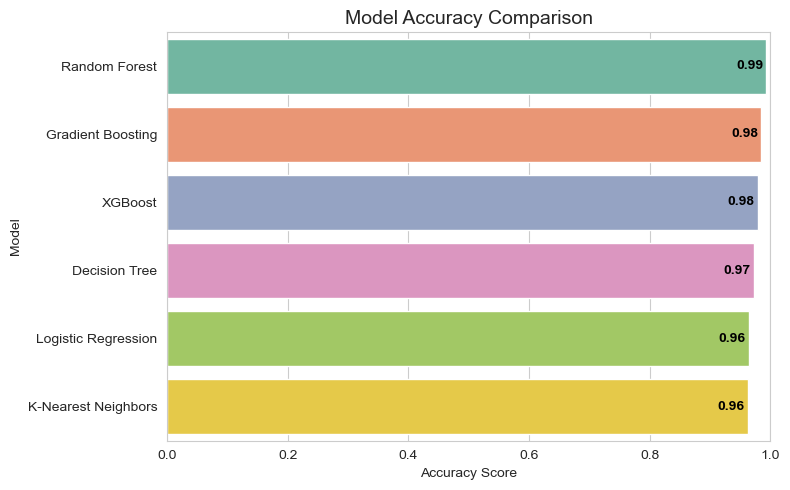

In [101]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Create bar plot
bar = sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='Set2')

# Add accuracy labels on bars (inside the bars)
for i, v in enumerate(accuracy_df['Accuracy']):
    bar.text(v - 0.05, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

# Labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.xlim(0.0, 1.0)  # Ensure values stay inside plot

plt.tight_layout()
plt.show()


### Model Accuracy Comparison: Summary 

1. Random Forest - 0.99 (🚀 Highest performer)   
2. Gradient Boosting	 - 0.98	 
3. XGBoost	-  0.98	  
4. Decision Tree	 - 0.97   
5. Logistic Regression - 0.96  	
6. K-Nearest Neighbors -	0.96

We make bar graph for clear view
### code
Seaborn’s barplot to compare the accuracy scores of different machine learning models from accuracy_df. Each bar represents a model, and the actual accuracy value is displayed inside the bar using bar.text() with formatting for better readability. The plot is styled with whitegrid, a fixed width (xlim(0.0, 1.0)), and a compact layout to ensure clarity and a neat appearance.



In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

class CropRecommender:
    def __init__(self):
        self.model = RandomForestClassifier(random_state=0)
        self.scaler = StandardScaler()
        self.encoder = LabelEncoder()
        self.is_trained = False

    def load_data(self, df, features, target):
        self.X = df[features]
        self.y = self.encoder.fit_transform(df[target])
        print("Data loaded and encoded.")

    def preprocess(self):
        self.X_scaled = self.scaler.fit_transform(self.X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X_scaled, self.y, test_size=0.33, random_state=42, shuffle=True
        )
        print("Data scaled and split.")

    def train(self):
        self.model.fit(self.X_train, self.y_train)
        self.is_trained = True
        print("Model trained successfully.")

    def evaluate(self):
        if not self.is_trained:
            print("Model not trained yet!")
            return
        y_pred = self.model.predict(self.X_test)
        acc = accuracy_score(self.y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred, target_names=self.encoder.classes_))

    def get_accuracy(self):
        if not self.is_trained:
            print("Model not trained yet!")
            return None
        y_pred = self.model.predict(self.X_test)
        acc = accuracy_score(self.y_test, y_pred)
        print(f"RandomForestClassifier Model Accuracy: {acc:.4f}")
        return acc

    def compare_train_test_accuracy(self):
        if not self.is_trained:
            print("Model not trained yet!")
            return

        train_pred = self.model.predict(self.X_train)
        test_pred = self.model.predict(self.X_test)

        train_acc = accuracy_score(self.y_train, train_pred)
        test_acc = accuracy_score(self.y_test, test_pred)

        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy:  {test_acc:.4f}")

        if train_acc - test_acc > 0.10:
            print("Possible overfitting detected.")
        else:
            print("No significant overfitting.")

    def predict(self, input_data):
        if not self.is_trained:
            print("Model not trained yet!")
            return
        input_scaled = self.scaler.transform([input_data])
        prediction = self.model.predict(input_scaled)
        return self.encoder.inverse_transform(prediction)[0]

        
    def plot_confusion_matrix(self):
        if not self.is_trained:
            print("🚫 Model not trained yet!")
            return

        from sklearn.metrics import confusion_matrix
        import seaborn as sns
        import matplotlib.pyplot as plt

        y_pred = self.model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.encoder.classes_,
                    yticklabels=self.encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()



#### Create Object 

In [105]:
recommender = CropRecommender()

#### Load and tain datsets 

In [107]:
recommender.load_data(df, features, target)

Data loaded and encoded.


In [109]:
recommender.preprocess()


Data scaled and split.


In [111]:
recommender.train()

Model trained successfully.


In [113]:
recommender.get_accuracy()

RandomForestClassifier Model Accuracy: 0.9931


0.9931129476584022

In [115]:
recommender.compare_train_test_accuracy()


Training Accuracy: 1.0000
Testing Accuracy:  0.9931
No significant overfitting.


In [117]:
recommender.evaluate()

Accuracy: 0.9931

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.88      1.00      0.93        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      

#### Code 
The evaluate() method of the recommender is invoked to check the performance of the learned model for test data. When this function is invoked, first, it does a check if the given model has been trained or not. In case the model has already been trained, then this function uses that trained model for making predictions from the test set and subsequently compares these predictions with actual crop labels. It calculates the accuracy measure, i.e., the ratio of accurate predictions, and prints a classification report. This report has detailed statistics in terms of precision, recall, and F1-score for all crop classes, which gives you an idea not just about how good your model is in terms of accuracy but how well your model is for all crop classes. This performance check is done in order to check if your model is reliable or not prior to making predictions for real life.

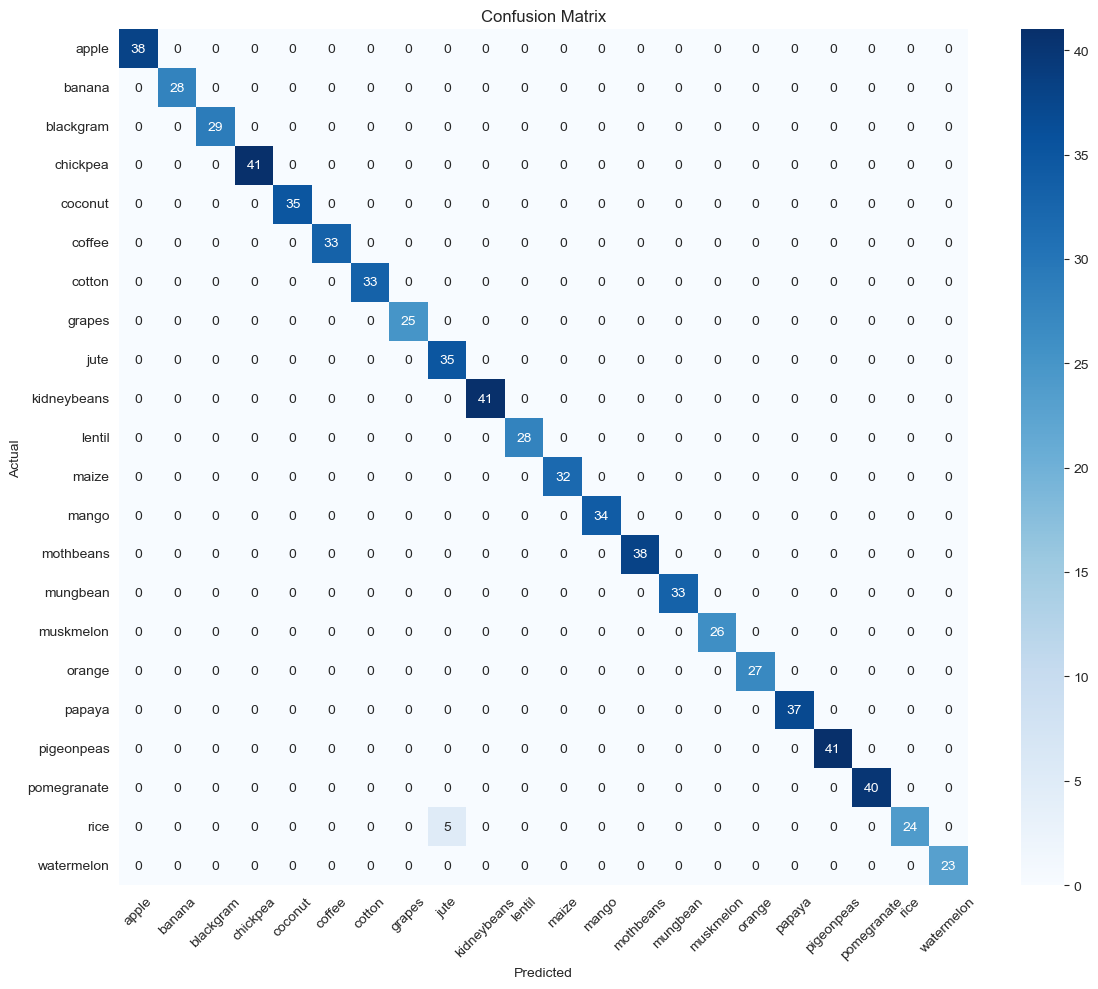

In [119]:
recommender.plot_confusion_matrix()

#### code 

recommender.plot_confusion_matrix() is invoked to view how well a model does through a confusion matrix heatmap. Upon invocation, the method will first check if the model has been trained already. If yes, then it will predict test data and match predictions against true crop labels. A heatmap for a confusion matrix will then be plotted using Matplotlib and Seaborn where true crops are along rows while predicted crops are along columns.

Each row in the matrix provides the frequency for each pair of actual vs. predicted category. High diagonal values represent good accuracy (correct predictions), while off-diagonal entries reflect misclassifications. This plot is helpful for observing which crops are being accurately predicted and which are getting confused, and is a good diagnostic for improving the performance of the model.

In [123]:
sample_input = [74, 89, 99, 5.98, 68.89, 74, 56]
predicted_crop = recommender.predict(sample_input)
print(f"🌱 Recommended Crop: {predicted_crop}")

🌱 Recommended Crop: watermelon


#### code 

Finally, we made basic and simple crop recommendations. Give input as per column, then it gives the best results according to the data.

### code explanation



The following is an example code for a reusability-focused `CropRecommender` class that facilitates easy creation of a Random Forest-based crop prediction model. The class offers methods for loading data and encoding, feature scale adjustment, and splitting between train/test datasets. Ongoing evaluation after training is possible through accuracy scores and classification reports.The class has a member function for comparing test and training accuracy for determining overfitting. The `predict()` member takes in new environmental conditions as inputs and outputs a crop recommendation. A member function for confusion matrix plotting graphically shows how well each crop is predicted. In essence, this class wraps all machine learning workflow—data preprocessing, training, evaluation, and prediction—into a clean and compact way.

## Concussion
This project revolves around creating a crop prediction system that leverages machine learning and analyzes key environmental and soil attributes. The dataset encompasses crucial agricultural features like Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall. An in-depth exploratory data analysis (EDA) was performed to assess data distributions, locate outliers, and discover how variables interacted within the dataset using statistical summaries and correlation examination through heatmaps.

To clean the data, several steps were taken, such as removing duplicates, label encoding, and standardization of features, creating a uniform format for easier analysis. Job specialized Python classes streamlined the data cleaning and statistical computation workflow, enabling a defined structure that's easily reusable across different models. The resultant dataset underwent a training and evaluation cycle in which several machine learning classifiers were designed to ascertain which crop would optimally grow under predefined conditions.

For the comparison, Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), Gradient Boosting, and XGBoost were selected. The accuracy scoring system was used to evaluate model performance where Random Forest Classifier outperformed other models proving it was the most accurate within multi-class classification in this case study approached from an agricultural perspective.

The project was aided by an extensive list of Python libraries. For data cleaning and manipulation, Pandas and NumPy were used, while Matplotlib, Seaborn, and Plotly were used for static and interactive data visualization. Machine learning models were built and evaluated using Scikit-learn and XGBoost, and some statistical computations including skewness and Z-score analysis were done using SciPy.  
An outcome worth noting from the project is the implementation of static visualizations using Seaborn and Matplotlib alongside interactive ones using Plotly for deeper analysis. Also, using OOP for data processing improved the comprehension and order of the workflow. Consequently, this model is now capable of predicting the optimal crop to be cultivated given certain environmental and nutrient parameters, enabling farmers to optimize their decisions through data, thereby promoting sustainable agriculture.


